# MIE 1624 Introduction to Data Science and Analytics 

# Winter 2019

---

# Assignment 1

# Computing the sentiment of text information (tweets)

---

**Submitted by: Stepan Oskin**
**S/N: 1004648624**


---

**February 28, 2019**

---

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparations" data-toc-modified-id="Preparations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparations</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#User-defined-functions" data-toc-modified-id="User-defined-functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>User-defined functions</a></span><ul class="toc-item"><li><span><a href="#'unique_values'" data-toc-modified-id="'unique_values'-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span><code>'unique_values'</code></a></span></li><li><span><a href="#'duplicate_check'" data-toc-modified-id="'duplicate_check'-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span><code>'duplicate_check'</code></a></span></li><li><span><a href="#'tokenize_text'" data-toc-modified-id="'tokenize_text'-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span><code>'tokenize_text'</code></a></span></li><li><span><a href="#'string_concat'" data-toc-modified-id="'string_concat'-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span><code>'string_concat'</code></a></span></li><li><span><a href="#'plot_wordcloud'" data-toc-modified-id="'plot_wordcloud'-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span><code>'plot_wordcloud'</code></a></span></li><li><span><a href="#'tfm_2class'" data-toc-modified-id="'tfm_2class'-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span><code>'tfm_2class'</code></a></span></li></ul></li><li><span><a href="#Read-files" data-toc-modified-id="Read-files-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read files</a></span><ul class="toc-item"><li><span><a href="#Verify-current-working-directory" data-toc-modified-id="Verify-current-working-directory-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Verify current working directory</a></span></li><li><span><a href="#Set-paths-to-files" data-toc-modified-id="Set-paths-to-files-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Set paths to files</a></span></li><li><span><a href="#Read-the-file-'generic_tweets.txt'" data-toc-modified-id="Read-the-file-'generic_tweets.txt'-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Read the file <code>'generic_tweets.txt'</code></a></span></li><li><span><a href="#Read-the-file-'US_aurline_tweets.csv'" data-toc-modified-id="Read-the-file-'US_aurline_tweets.csv'-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Read the file <code>'US_aurline_tweets.csv'</code></a></span></li></ul></li></ul></li><li><span><a href="#Data-cleanup" data-toc-modified-id="Data-cleanup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data cleanup</a></span><ul class="toc-item"><li><span><a href="#Generic-tweets-dataset" data-toc-modified-id="Generic-tweets-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generic tweets dataset</a></span><ul class="toc-item"><li><span><a href="#Consistency-of-data" data-toc-modified-id="Consistency-of-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Consistency of data</a></span><ul class="toc-item"><li><span><a href="#Generic-tweets-----column-'id'" data-toc-modified-id="Generic-tweets-----column-'id'-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>Generic tweets --  column <code>'id'</code></a></span></li><li><span><a href="#Generic-tweets----column-'class'" data-toc-modified-id="Generic-tweets----column-'class'-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Generic tweets -- column <code>'class'</code></a></span></li><li><span><a href="#Generic-tweets----column-'date'-(DOES-NOT-DISPLAY-RIGHT-IF-'date'-WAS-NOT-CONVERTED-TO-DATETIME)" data-toc-modified-id="Generic-tweets----column-'date'-(DOES-NOT-DISPLAY-RIGHT-IF-'date'-WAS-NOT-CONVERTED-TO-DATETIME)-2.1.1.3"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>Generic tweets -- column <code>'date'</code> (DOES NOT DISPLAY RIGHT IF <code>'date'</code> WAS NOT CONVERTED TO DATETIME)</a></span></li><li><span><a href="#Generic-tweets----column-'query'" data-toc-modified-id="Generic-tweets----column-'query'-2.1.1.4"><span class="toc-item-num">2.1.1.4&nbsp;&nbsp;</span>Generic tweets -- column <code>'query'</code></a></span></li></ul></li><li><span><a href="#Data-types-and-missing-values" data-toc-modified-id="Data-types-and-missing-values-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data types and missing values</a></span></li><li><span><a href="#Replacing-HTML-character-codes" data-toc-modified-id="Replacing-HTML-character-codes-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Replacing HTML character codes</a></span></li><li><span><a href="#Extracting-hashtags-from-tweets" data-toc-modified-id="Extracting-hashtags-from-tweets-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Extracting hashtags from tweets</a></span><ul class="toc-item"><li><span><a href="#Top-10-hashtags-by-frequency-in-'generic_tweets':" data-toc-modified-id="Top-10-hashtags-by-frequency-in-'generic_tweets':-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>Top 10 hashtags by frequency in <code>'generic_tweets'</code>:</a></span></li></ul></li><li><span><a href="#Removing-links-from-tweets" data-toc-modified-id="Removing-links-from-tweets-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Removing links from tweets</a></span></li><li><span><a href="#Tokenizing,-removing-stop-words-and-punctuation,-stemming" data-toc-modified-id="Tokenizing,-removing-stop-words-and-punctuation,-stemming-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Tokenizing, removing stop words and punctuation, stemming</a></span><ul class="toc-item"><li><span><a href="#NLTK-english-stopwords,-Regexp-tokenizer,-Porter-stemmer,-min_len=3" data-toc-modified-id="NLTK-english-stopwords,-Regexp-tokenizer,-Porter-stemmer,-min_len=3-2.1.6.1"><span class="toc-item-num">2.1.6.1&nbsp;&nbsp;</span>NLTK english stopwords, Regexp tokenizer, Porter stemmer, min_len=3</a></span></li><li><span><a href="#NLTK-english-stopwords,-Regexp-tokenizer,-Snowball-stemmer,-min_len=3" data-toc-modified-id="NLTK-english-stopwords,-Regexp-tokenizer,-Snowball-stemmer,-min_len=3-2.1.6.2"><span class="toc-item-num">2.1.6.2&nbsp;&nbsp;</span>NLTK english stopwords, Regexp tokenizer, Snowball stemmer, min_len=3</a></span></li></ul></li><li><span><a href="#BONUS-SECTION----Duplicate-entries" data-toc-modified-id="BONUS-SECTION----Duplicate-entries-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>BONUS SECTION -- Duplicate entries</a></span><ul class="toc-item"><li><span><a href="#Initial-duplicate-check" data-toc-modified-id="Initial-duplicate-check-2.1.7.1"><span class="toc-item-num">2.1.7.1&nbsp;&nbsp;</span>Initial duplicate check</a></span></li><li><span><a href="#Duplicate-checks" data-toc-modified-id="Duplicate-checks-2.1.7.2"><span class="toc-item-num">2.1.7.2&nbsp;&nbsp;</span>Duplicate checks</a></span></li><li><span><a href="#Checking-same-'user'-and-'text'" data-toc-modified-id="Checking-same-'user'-and-'text'-2.1.7.3"><span class="toc-item-num">2.1.7.3&nbsp;&nbsp;</span>Checking same <code>'user'</code> and <code>'text'</code></a></span></li><li><span><a href="#large-number-of-same-tweets----potential-twitter-bots" data-toc-modified-id="large-number-of-same-tweets----potential-twitter-bots-2.1.7.4"><span class="toc-item-num">2.1.7.4&nbsp;&nbsp;</span>large number of same tweets -- potential twitter bots</a></span></li><li><span><a href="#Removing-users-with-a-large-number-of-posts" data-toc-modified-id="Removing-users-with-a-large-number-of-posts-2.1.7.5"><span class="toc-item-num">2.1.7.5&nbsp;&nbsp;</span>Removing users with a large number of posts</a></span></li><li><span><a href="#in-addition,-users-post-duplicated-messages" data-toc-modified-id="in-addition,-users-post-duplicated-messages-2.1.7.6"><span class="toc-item-num">2.1.7.6&nbsp;&nbsp;</span>in addition, users post duplicated messages</a></span></li><li><span><a href="#To-correct-for-both,-duplicated-messages-for-the-same-'user'-with-the-same-'text'-are-removed-from-the-DataFrame" data-toc-modified-id="To-correct-for-both,-duplicated-messages-for-the-same-'user'-with-the-same-'text'-are-removed-from-the-DataFrame-2.1.7.7"><span class="toc-item-num">2.1.7.7&nbsp;&nbsp;</span>To correct for both, duplicated messages for the same <code>'user'</code> with the same <code>'text'</code> are removed from the DataFrame</a></span></li><li><span><a href="#Verification-of-results" data-toc-modified-id="Verification-of-results-2.1.7.8"><span class="toc-item-num">2.1.7.8&nbsp;&nbsp;</span>Verification of results</a></span></li></ul></li></ul></li><li><span><a href="#U.S.-airline-dataset" data-toc-modified-id="U.S.-airline-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>U.S. airline dataset</a></span><ul class="toc-item"><li><span><a href="#Consistency-of-data" data-toc-modified-id="Consistency-of-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Consistency of data</a></span><ul class="toc-item"><li><span><a href="#US-airline-tweets-----column-'id'" data-toc-modified-id="US-airline-tweets-----column-'id'-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>US airline tweets --  column <code>'id'</code></a></span></li><li><span><a href="#US-airline-tweets----column-'sentiment'" data-toc-modified-id="US-airline-tweets----column-'sentiment'-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>US airline tweets -- column <code>'sentiment'</code></a></span></li><li><span><a href="#US-airline-tweets----column-'negative_reason'" data-toc-modified-id="US-airline-tweets----column-'negative_reason'-2.2.1.3"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>US airline tweets -- column <code>'negative_reason'</code></a></span></li><li><span><a href="#US-airline-tweets----column-'retweet_count'" data-toc-modified-id="US-airline-tweets----column-'retweet_count'-2.2.1.4"><span class="toc-item-num">2.2.1.4&nbsp;&nbsp;</span>US airline tweets -- column <code>'retweet_count'</code></a></span></li></ul></li><li><span><a href="#Data-types-and-missing-values" data-toc-modified-id="Data-types-and-missing-values-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data types and missing values</a></span></li><li><span><a href="#Replacing-HTML-character-codes" data-toc-modified-id="Replacing-HTML-character-codes-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Replacing HTML character codes</a></span></li><li><span><a href="#Extracting-hashtags-from-tweets" data-toc-modified-id="Extracting-hashtags-from-tweets-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Extracting hashtags from tweets</a></span><ul class="toc-item"><li><span><a href="#Top-10-hashtags-by-frequency-in-'generic_tweets':" data-toc-modified-id="Top-10-hashtags-by-frequency-in-'generic_tweets':-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>Top 10 hashtags by frequency in <code>'generic_tweets'</code>:</a></span></li></ul></li><li><span><a href="#Extracting-user-handles-(@someone)-from-tweet-texts" data-toc-modified-id="Extracting-user-handles-(@someone)-from-tweet-texts-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Extracting user handles (@someone) from tweet texts</a></span><ul class="toc-item"><li><span><a href="#Top-10-handles-by-frequency-in-US-Airline-tweets:" data-toc-modified-id="Top-10-handles-by-frequency-in-US-Airline-tweets:-2.2.5.1"><span class="toc-item-num">2.2.5.1&nbsp;&nbsp;</span>Top 10 handles by frequency in US Airline tweets:</a></span></li></ul></li><li><span><a href="#Removing-links-from-tweets" data-toc-modified-id="Removing-links-from-tweets-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Removing links from tweets</a></span><ul class="toc-item"><li><span><a href="#Removing-the-links" data-toc-modified-id="Removing-the-links-2.2.6.1"><span class="toc-item-num">2.2.6.1&nbsp;&nbsp;</span>Removing the links</a></span></li><li><span><a href="#Verification-of-results" data-toc-modified-id="Verification-of-results-2.2.6.2"><span class="toc-item-num">2.2.6.2&nbsp;&nbsp;</span>Verification of results</a></span></li></ul></li><li><span><a href="#Tokenizing,-removing-stop-words-and-punctuation,-stemming" data-toc-modified-id="Tokenizing,-removing-stop-words-and-punctuation,-stemming-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Tokenizing, removing stop words and punctuation, stemming</a></span><ul class="toc-item"><li><span><a href="#NLTK-english-stopwords,-Regexp-tokenizer,-Porter-stemmer,-min_len=3" data-toc-modified-id="NLTK-english-stopwords,-Regexp-tokenizer,-Porter-stemmer,-min_len=3-2.2.7.1"><span class="toc-item-num">2.2.7.1&nbsp;&nbsp;</span>NLTK english stopwords, Regexp tokenizer, Porter stemmer, min_len=3</a></span></li><li><span><a href="#NLTK-english-stopwords,-Regexp-tokenizer,-Snowball-stemmer,-min_len=3" data-toc-modified-id="NLTK-english-stopwords,-Regexp-tokenizer,-Snowball-stemmer,-min_len=3-2.2.7.2"><span class="toc-item-num">2.2.7.2&nbsp;&nbsp;</span>NLTK english stopwords, Regexp tokenizer, Snowball stemmer, min_len=3</a></span></li></ul></li><li><span><a href="#BONUS-SECTION----Duplicate-entries" data-toc-modified-id="BONUS-SECTION----Duplicate-entries-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>BONUS SECTION -- Duplicate entries</a></span><ul class="toc-item"><li><span><a href="#Initial-duplicate-check" data-toc-modified-id="Initial-duplicate-check-2.2.8.1"><span class="toc-item-num">2.2.8.1&nbsp;&nbsp;</span>Initial duplicate check</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Exploratory-analysis" data-toc-modified-id="Exploratory-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory analysis</a></span><ul class="toc-item"><li><span><a href="#Sanity-check----length-of-'text'-column:" data-toc-modified-id="Sanity-check----length-of-'text'-column:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sanity check -- length of <code>'text'</code> column:</a></span><ul class="toc-item"><li><span><a href="#Length-of-tweets-in-General-tweets-data-set" data-toc-modified-id="Length-of-tweets-in-General-tweets-data-set-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Length of tweets in General tweets data set</a></span><ul class="toc-item"><li><span><a href="#Several-tweets-exceed-140-character-limit-because-&quot;&lt;3&quot;-was-replaced-with-&quot;love&quot;-in-section-2.1.2" data-toc-modified-id="Several-tweets-exceed-140-character-limit-because-&quot;<3&quot;-was-replaced-with-&quot;love&quot;-in-section-2.1.2-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Several tweets exceed 140 character limit because "&lt;3" was replaced with "love" in section 2.1.2</a></span></li></ul></li><li><span><a href="#Length-of-tweets-in-US-airline-tweets-data-set" data-toc-modified-id="Length-of-tweets-in-US-airline-tweets-data-set-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Length of tweets in US airline tweets data set</a></span><ul class="toc-item"><li><span><a href="#Some-tweets-have-length-over-140-symbols" data-toc-modified-id="Some-tweets-have-length-over-140-symbols-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Some tweets have length over 140 symbols</a></span></li></ul></li><li><span><a href="#Relationship-between-'negative_reason'-and-'retweet_count'" data-toc-modified-id="Relationship-between-'negative_reason'-and-'retweet_count'-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Relationship between <code>'negative_reason'</code> and <code>'retweet_count'</code></a></span></li></ul></li><li><span><a href="#Tweets-about-US-Airways" data-toc-modified-id="Tweets-about-US-Airways-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tweets about US Airways</a></span></li></ul></li><li><span><a href="#Preparing-model-features" data-toc-modified-id="Preparing-model-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing model features</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Vectorization</a></span><ul class="toc-item"><li><span><a href="#Sparsity" data-toc-modified-id="Sparsity-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Sparsity</a></span></li><li><span><a href="#Elements-of-each-document-vector" data-toc-modified-id="Elements-of-each-document-vector-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Elements of each document vector</a></span></li></ul></li><li><span><a href="#Frequency-vectors" data-toc-modified-id="Frequency-vectors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Frequency vectors</a></span><ul class="toc-item"><li><span><a href="#Frequency-vectors-using-NLTK" data-toc-modified-id="Frequency-vectors-using-NLTK-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Frequency vectors using <code>NLTK</code></a></span></li><li><span><a href="#Frequency-vectors-using-Scikit-Learn" data-toc-modified-id="Frequency-vectors-using-Scikit-Learn-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Frequency vectors using <code>Scikit-Learn</code></a></span></li><li><span><a href="#Composing-a-term-frequency-matrix-using-CountVectorizer" data-toc-modified-id="Composing-a-term-frequency-matrix-using-CountVectorizer-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Composing a term frequency matrix using <code>CountVectorizer</code></a></span></li><li><span><a href="#Negative-mentions-vs-positive-mentions-per-term" data-toc-modified-id="Negative-mentions-vs-positive-mentions-per-term-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Negative mentions vs positive mentions per term</a></span></li><li><span><a href="#Frequency-vectors-using-Gensim" data-toc-modified-id="Frequency-vectors-using-Gensim-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Frequency vectors using <code>Gensim</code></a></span></li></ul></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>One-hot encoding</a></span><ul class="toc-item"><li><span><a href="#One-hot-encoding-using-NLTK" data-toc-modified-id="One-hot-encoding-using-NLTK-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>One-hot encoding using <code>NLTK</code></a></span></li><li><span><a href="#One-hot-encoding-using-Scikit-learn" data-toc-modified-id="One-hot-encoding-using-Scikit-learn-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>One-hot encoding using <code>Scikit-learn</code></a></span></li><li><span><a href="#One-hot-encoding-using-Gensim" data-toc-modified-id="One-hot-encoding-using-Gensim-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>One-hot encoding using <code>Gensim</code></a></span></li></ul></li><li><span><a href="#Term-Frequency-–-Inverse-Document-Frequency-(TF-IDF)" data-toc-modified-id="Term-Frequency-–-Inverse-Document-Frequency-(TF-IDF)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Term Frequency – Inverse Document Frequency (TF-IDF)</a></span><ul class="toc-item"><li><span><a href="#Accentuating-terms-relevant-to-a-specific-document" data-toc-modified-id="Accentuating-terms-relevant-to-a-specific-document-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Accentuating terms relevant to a specific document</a></span></li><li><span><a href="#Computing-TF–IDF" data-toc-modified-id="Computing-TF–IDF-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Computing TF–IDF</a></span></li><li><span><a href="#TD-IDF-using-NLTK-(NOT-SURE-IF-WORKING)" data-toc-modified-id="TD-IDF-using-NLTK-(NOT-SURE-IF-WORKING)-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>TD-IDF using <code>NLTK</code> (NOT SURE IF WORKING)</a></span></li><li><span><a href="#TF-IDF-using-Scikit-Learn" data-toc-modified-id="TF-IDF-using-Scikit-Learn-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>TF-IDF using <code>Scikit-Learn</code></a></span></li><li><span><a href="#TF-IDF-using-Gensim" data-toc-modified-id="TF-IDF-using-Gensim-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>TF-IDF using <code>Gensim</code></a></span></li></ul></li><li><span><a href="#Distributed-Representation" data-toc-modified-id="Distributed-Representation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Distributed Representation</a></span><ul class="toc-item"><li><span><a href="#Encoding-document-similarity" data-toc-modified-id="Encoding-document-similarity-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Encoding document similarity</a></span></li><li><span><a href="#Word2vec" data-toc-modified-id="Word2vec-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span><code>Word2vec</code></a></span></li><li><span><a href="#Doc2vec" data-toc-modified-id="Doc2vec-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span><code>Doc2vec</code></a></span></li><li><span><a href="#Distributed-representations-using-Gensim" data-toc-modified-id="Distributed-representations-using-Gensim-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Distributed representations using <code>Gensim</code></a></span></li><li><span><a href="#Training-Gensim's-distributed-representations-model" data-toc-modified-id="Training-Gensim's-distributed-representations-model-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>Training <code>Gensim</code>'s distributed representations model</a></span></li></ul></li><li><span><a href="#Summary-of-all-methods" data-toc-modified-id="Summary-of-all-methods-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Summary of all methods</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-assumptions" data-toc-modified-id="Model-assumptions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model assumptions</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

## Preparations

### Import libraries

In [1]:
# Download the necessary library
!pip -q install textblob
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections.abc import Iterable
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk import download
import re
import os

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 0)

In [2]:
# downloading stopwords for NLTK
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### User-defined functions

#### `'unique_values'`

function checks the percentage of unique values in a column and prints value counts.

In [3]:
def unique_values(df_column: pd.Series, value_counts=True):
    """
    function to check unique values in a data frame column
    :param df_column: pd.Series -- column (pandas Series) to be checked for unique values
    :param value_counts: boolean -- (optional) show value counts, (default=True)
    :return: None
    """
    column_total_values: int = len(df_column)
    column_unique_values: int = len(df_column.value_counts())
    print("Out of the total {0:,} records in column '{1}', {2:,}({3:.2f}%) have unique values."
          .format(column_total_values,
                  df_column.name,
                  column_unique_values,
                  column_unique_values / column_total_values * 100))
    if value_counts:
        print("\nValue counts for column '{0}':".format(df_column.name))
        print(df_column.value_counts())

#### `'duplicate_check'`

function performs a duplicate check on a provided DataFrame using three sets of detection criteria:

* all columns must match

* all columns with one excluded (provide list `'cols_to_drop'` to specify which columns should be excluded one by one

* particular subsets of columns (provide dictionary `'subsets_to_check'` to specify names of subsets and corresponding lists of columns

Presents and plots results of all checks as a barchart and a table (percentages are from 100%).

In [4]:
def duplicate_check(df, subsets_to_check: dict = None, cols_to_drop = None):
    """
     function to perform the duplicate check

     takes as input a DataFrame and one (or both) of the optional parameters:

     'subsets_to_check' is a dict that will be used for duplicate check criteria
     its keys represent the name of the subset of columns and its values represent
     the lists of columns to be used as criteria

     'subset_to_drop' is a list of columns to be excluded one by one from criteria
     to perform duplicate checks without these columns
     if 'subset_to_drop' is empty, this step is skipped

    :param df: pd.DataFrame -- DataFrame on which to perform the duplicate check

    :param subsets_to_check: dict -- dict, where keys are column subset names and
                                     values are subsets of columns to use

    :param cols_to_drop: Iterable -- an iterable containing names of columns to be
                                     excluded one by one from detection criteria

    :return dup_result_df: pd.DataFrame -- DataFrame with results of the duplicate check
    """
    
    def perform_duplicate_check(result_key, col_subset):
        """
        function to perform the actual duplicate check
        and record its results
        
        :param result_key: string -- key to be used to record results of the check
        :param col_subset: list -- subset that will be used to perform the check
        
        :return: None, updates nonlocal dict 'dup_results'
        """
        # variables from the outer scope
        nonlocal df, dup_results
        # create a new entry in results dictionary 'dup_results'
        dup_results[result_key] = dict()
        # determine the number of duplicates
        dup_results[result_key]['num_duplicates'] = df.duplicated(subset=col_subset).sum()
        dup_results[result_key]['num_total'] = len(df)
        dup_results[result_key]['percentage'] = dup_results[result_key]['num_duplicates'] \
                                                / dup_results[result_key]['num_total'] * 100
        print("Subset '{0}': {1:,} ({2:.2f}% of total {3:,}) records are detected as duplicated."
              .format(result_key,
                      dup_results[result_key]['num_duplicates'],
                      dup_results[result_key]['percentage'],
                      dup_results[result_key]['num_total']))

    # create a dict to store results of the duplicate check
    dup_results = dict()

    # duplicate check using all columns as criteria
    key = 'all_columns'
    subset = df.columns
    perform_duplicate_check(key, subset)

    # duplicate check using 'cols_to_drop' -- each test takes all columns minus one
    if isinstance(cols_to_drop, Iterable):
        for col in cols_to_drop:
            key = col
            subset = df.columns
            subset = subset.drop(col)
            perform_duplicate_check(col, subset)

    if isinstance(subsets_to_check, dict):
        for k, v in subsets_to_check.items():
            perform_duplicate_check(k, v)

    dup_results_df = pd.DataFrame(dup_results)

    # plot results of the check
    # create figure and axis
    f, ax = plt.subplots(1, figsize=(6, 6))

    # plot results
    dup_results_df.T['num_duplicates'] \
        .sort_values() \
        .plot(kind='barh', color='gray')

    # set axis parameters
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 16,
            }
    ax.set_title("Results of the duplicate check", fontdict=font)
    ax.set_ylabel("Subset used as detection criteria", fontdict=font)
    ax.set_xlabel("Number of duplicate records", fontdict=font)

    ax.tick_params(axis='both', labelsize=14)

    return dup_results_df

#### `'tokenize_text'`

function is used to tokenize and filter text into words.

* words are converted to lower case

* stop words are removed

* words are stemmed using the specified stemmer ('porter', 'snowball')

* all words with length less than provided `'min_length'` are filtered out

* returns a list of filtered tokens generated from input text

In [5]:
def tokenize_text(text):
    """
    tokenizes and filters provided text into words

    since this function is used inside of a pandas.apply
    method, it can only accept one parameter 'text' as
    input, and therefore relies on the rest of variables
    to be declared outside of the function and accessed 
    through the global scope
    
    these variables include: NLTK tokenizer as 'tokenizer',
    NLTK stemmer as 'stemmer', list of stop words as 'stop_words',
    and min length used to filter tokens as 'min_length'

    first, tokens are created from input text
    using the global tokenizer 'tokenizer',

    then, words are converted to lower case,
    punctuation and stop words are removed,

    after that, words are stemmed using the
    global stemmer 'stemmer'

    finally, all words with length < 3 are filtered out

    param: text       -- string -- text to be tokenized
    
    global variable: tokenizer  -- NLTK tokenizer
                                   tokenizer used to generate tokens
                                   (needs to be initialized as 'tokenizer'
                                   before this function can be called)
    global variable: stemmer    -- NLTK stemmer
                                   stemmer used to stem tokens
                                   (needs to be initialized as 'stemmer'
                                   before this function can be called)
    global variable: stop_words -- list
                                   list of stop words to use for filtering 
                                   out all tokens that are in this list
    global variable: min_length -- int
                                   min length used to filter out all
                                   tokens shorter than 'min_length'

    returns: filtered_tokens -- list of tokens produced from text
    """
    # tokenizer and stemmer used by the function, need to be initialized prior to call
    global tokenizer, stemmer, stop_words, min_length
    # creating a map object with 'text' tokenized into lower-cased 'words'
    words = map(lambda word: word.lower(), tokenizer.tokenize(text))

    # remove stop words -- common words, such as 'the', 'a', 'in', etc. using the provided list
    words = [word for word in words if word not in stop_words]

    # stem the words
    tokens = (list(map(lambda token: stemmer.stem(token), words)))

    # remove all the words with length less than 3
    filtered_tokens = list(filter(lambda token: len(token) >= min_length, tokens))

    return filtered_tokens

#### `'string_concat'`

a function to concatenate a single string out of a series of text documents

returns a string of all words encountered in the series of documents.

In [107]:
def string_concat(ser, string_name="", display_sym=500,
                  input_type='strings'):
    """
    a function to concatenate a single string 
    out of a series of text documents
    """
    con_string = []
    
    if input_type == 'strings':
        for text in ser:
            con_string.append(text)
    
    elif input_type == 'lists':
        for str_list in ser:
            con_string.append(" ".join(str_list))
    else:
        print("'input_type' must be 'strings' or 'lists'.")
    
    con_string = pd.Series(con_string).str.cat(sep=' ')
    
    print("First {0} symbols in the {1} string:\n"
          .format(display_sym, string_name))
    print(con_string[:display_sym])
    
    return con_string

#### `'plot_wordcloud'`

a function to plot a Word Cloud from a string of tokens

In [113]:
from wordcloud import WordCloud

def plot_wordcloud(string, colormap='viridis'):
    """
    a function to plot a Word Cloud from a string of tokens
    """
    wordcloud = WordCloud(width=1600, 
                      height=800,
                      max_font_size=200, 
                      colormap=colormap).generate(neg_string)

    f, ax = plt.subplots(1, figsize=(12,10))
    ax.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#### `'tfm_2class'`

a function to compute a Term Frequency Matrix from a corpus of documents (found in column `text_col` of `df`).

Uses `CountVectorizer` from `Scikit-learn` to perform tokenization and normalization of the documents in the corpus using using supplied parameters: 

* `stop_words` -- stop words dictionary to be used (default `Scikit-learn` built-in `english`)


* `min_df` -- min document frequency used by `CountVectorizer` to filter tokens when creating vocabulary of the corpus (default=0.01)


* `min_df` -- min document frequency used by `CountVectorizer` to filter tokens when creating vocabulary of the corpus (default=0.9)


* `return_type` -- type of return expected from the function, must be either:

    * `'tfm'` for Term Frequency Matrix, a DataFrame with the term frequency matrix of the corpus is returned
    
    * `'dtr'` for difference / total ratio, a float representing the ration of sum of all absolute differences for each token (how much more occurances class 1 has vs class 2 for this token), divided by the total number of occurances by all tokens

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

def tfm_2class(df, label_col, label_vals, text_col,
               class_names=['neg_tf', 'pos_tf'],
               stop_words='english',
               min_df=0.01, max_df=0.9, 
               return_type='tfm'):
    """
    a function to create a Term Frequency Matrix
    from the corpus of documents found in 
    column 'text_col' of DataFrame 'df'
    
    this function is designed to work with 2 classes
    of target variable found in column 'label_col' of 'df',
    values of classes (e.g., -1, 1) 
    need to be supplied as a list in parameter 'label_vals'
    
    class names for the return DataFrame
    can be specified via parameters 
    'class1_name' and 'class2_name'
    
    'text_col' is the name of column in 'df'
    contining documents to be summarized
    
    param: df -- pd.DataFrame  -- DataFrame that contains
                                the corpus to be summarized
           label_col -- string -- name of the column
                                in 'df' containing label
                                (target) information
           label_vals -- list  -- list of values that 
                                 'label_col' can take
                                 (e.g., [1, -1])
                                 only 2 values supported
    
    
    returns: tfm_df -- pd.DataFrame -- term frequency
                                       matrix of the corpus
    """
    # initialize CountVectorizer from Scikit-learn
    vectorizer = CountVectorizer(strip_accents='unicode',
                                 stop_words=stop_words,
                                 max_df=max_df,
                                 min_df=min_df)
    
    # fit vectorizer to corpus in 'text_col' of 'df'
    vectors_f = vectorizer.fit(df[text_col])

    # create a subset of 'df' with all records of class 1
    class1_subset = df \
        .loc[df[label_col] == label_vals[0], text_col]
    # vectorize subset into a sparse matrix
    class1_doc_matrix = vectors_f \
        .transform(class1_subset)
    
    # create a subset of 'df' with all records of class 2
    class2_subset = df \
        .loc[df[label_col] == label_vals[1], text_col]
    # vectorize subset into a sparse matrix
    class2_doc_matrix = vectors_f \
        .transform(class2_subset)
    
    # sum occurances of each token
    class1_tf = np.sum(class1_doc_matrix, axis=0)
    class2_tf = np.sum(class2_doc_matrix, axis=0)

    class1 = np.squeeze(np.asarray(class1_tf))
    class2 = np.squeeze(np.asarray(class2_tf))

    # create a DataFrame with token frequencies by class
    tfm_df = pd.DataFrame([class1, class2],
                          columns=vectors_f.get_feature_names()) \
                          .transpose()

    # change column names
    tfm_df.columns = class_names

    # create a new column with total token frequency
    tfm_df['total'] = tfm_df[class_names[0]] \
        + tfm_df[class_names[1]]

    # create a new column with difference between classes
    tfm_df['abs_diff'] = \
        abs(tfm_df[class_names[0]] \
                           - tfm_df[class_names[1]])

    if return_type == 'tfm':
        # return Term Frequency Matrix for the corpus
        return tfm_df
    
    elif return_type == 'dtr':
        # return sum of abs of all diff by total sum
        return tfm['abs_diff'].sum() / tfm['total'].sum()
    else:
        print("'return_type' must be either 'tfm' " +
              "for Term Frequency Matrix")
        print("or 'dtr' for AbsDiff / Total ratio.")

### Read files

#### Verify current working directory

>Note: if needed, adjust the path to the working directory.

In [6]:
#os.chdir('C:\\Users\\HP USER\\Documents\\repos\\mie1624-data-science-introduction')
os.getcwd()

'C:\\Users\\Administrator\\Documents\\repos\\mie1624-data-science-introduction'

#### Set paths to files

In [7]:
path_generic_tweets = 'data/generic_tweets.txt'
path_corpus = 'data/corpus.txt'
path_stop_words = 'data/stop_words.txt'
path_us_airline_tweets = 'data/US_airline_tweets.csv'

#### Read the file `'generic_tweets.txt'`

In [8]:
gt_df = pd.read_csv(path_generic_tweets)
# datetime conversion has been disabled to speed up the workflow, as 'date' is not currently used in the analysis
#gt_df['date'] = pd.to_datetime(gt_df['date'])
gt_df.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Read the file `'US_aurline_tweets.csv'`

In [9]:
at_df = pd.read_csv(path_us_airline_tweets)
at_df.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


## Data cleanup

### Generic tweets dataset

Description of the dataset:

The generic_tweets.txt file contains tweets that have had their sentiments already analyzed and recorded as binary values 0 (negative) and 4 (positive). 

Each line is a single tweet, which may contain multiple sentences despite their brevity. The comma-separated fields of each line are:

0 class the polarity of each tweet (0 = negative emotion, 4 = positive emotion)  
1 id the id of the tweet (e.g. 2087)  
2 date the date of the tweet (e.g. Sat May 16 23:58:44 UTC 2009)  
3 query the query (e.g. lyx). If there is no query, then this value is NO_QUERY.  
4 user the user that tweeted (e.g. robotickilldozr)  
5 text the text of the tweet (e.g. Lyx is cool)  

#### Consistency of data

In [10]:
gt_df.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


##### Generic tweets --  column `'id'`

`'id'` -- id of the tweet (e.g. 2087) 

All values in column `'id'` are consistent, most (99.9%) are unique. 

Unique values are checked using the user-defined function `'unique_values'`.

In [11]:
unique_values?

In [12]:
unique_values(gt_df['id'])

Out of the total 200,000 records in column 'id', 199,791(99.90%) have unique values.

Value counts for column 'id':
1679949786    2
1563681287    2
1686510726    2
1556014795    2
1693896863    2
1686057567    2
1573751209    2
1676194202    2
1677958804    2
1685080502    2
1686549205    2
1469267615    2
1677644051    2
1565800912    2
1564351504    2
1551301964    2
1678693526    2
1468992236    2
1467880442    2
1686202212    2
1558883884    2
1468338634    2
1548641597    2
1557203543    2
1693937588    2
1468544973    2
1684849365    2
1687936214    2
1685904327    2
1556267135    2
             ..
1564980131    1
1793393119    1
1691853729    1
1692891471    1
1557549983    1
1556028342    1
1693853935    1
1696084947    1
1468570566    1
1677474770    1
1694411392    1
1469590480    1
1687999439    1
1691409358    1
1469107148    1
1676457452    1
1676995528    1
1553144645    1
1686143941    1
1556315066    1
1564106218    1
1675932611    1
1691017012    1
1564779457    1
1559

##### Generic tweets -- column `'class'`

`'class'` -- polarity of each tweet (0 = negative emotion, 4 = positive emotion)  

**Generic tweets dataset is balanced**:

there are 100'000 positive and 100'000 negative tweets in the dataset `'generic_tweets.txt'`

In [13]:
gt_df['class'].value_counts()

4    100000
0    100000
Name: class, dtype: int64

##### Generic tweets -- column `'date'` (DOES NOT DISPLAY RIGHT IF `'date'` WAS NOT CONVERTED TO DATETIME)

`'date'` -- date of the tweet (e.g. Sat May 16 23:58:44 UTC 2009) 

`'generic_tweets.txt'` captures tweets from `2009-04-06` 22:19:45 to `2009-05-14` 04:06:02, 200'000 records in total.

In [14]:
gt_df['date'].describe()

count                           200000
unique                          112298
top       Fri Apr 17 21:57:42 PDT 2009
freq                                12
Name: date, dtype: object

##### Generic tweets -- column `'query'`

`'query'` -- query (e.g. lyx). If there is no query, then this value is NO_QUERY.  

All records from `'generic_tweets.txt'` have the same value of query, this feature can be removed from the dataframe.

In [15]:
gt_df['query'].value_counts()

NO_QUERY    200000
Name: query, dtype: int64

In [16]:
gt_df = gt_df.drop('query', axis=1)
gt_df.head()

,class,id,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


Column `'user'` will be investigated in **BONUS SECTION -- Duplicate entries**.

#### Data types and missing values

All data types are detected correctly:

* columns `'date'`, `'user'`, and `'text'` are of type `object`, which typically means they are strings. 
* columns `'class'` and `'id'` are `int`
    * They have a 64 at the end of them, which means they can be up to 64 bits long.
    * column `'class'` only contains values of 0 and 4, and could be converted to `category` data type. But in case of this data set such conversion would not result in a significant memory savings, and thus it hasn't been performed.

There are no missing values in `'generic_tweets.txt'`

In [17]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
class    200000 non-null int64
id       200000 non-null int64
date     200000 non-null object
user     200000 non-null object
text     200000 non-null object
dtypes: int64(2), object(3)
memory usage: 7.6+ MB


#### Replacing HTML character codes

Replacing '<3' with 'love':

In [18]:
gt_df['text'] = gt_df['text'].str.replace("&lt;3", 'love')
print("Done!")

Done!


HTML character codes:

* &quot;
* &amp;
* &lt;
* &gt;

In [19]:
# replacing HTML character codes with their ASCII equivalents
gt_df['text'] = gt_df['text'].str.replace("&quot;", '"')
gt_df['text'] = gt_df['text'].str.replace("&amp;", '&')
gt_df['text'] = gt_df['text'].str.replace("&lt;", '<')
gt_df['text'] = gt_df['text'].str.replace("&gt;", '>')
print("HTML character codes replaced with their ASCII equivalent in the DataFrame 'gt_df'!")

HTML character codes replaced with their ASCII equivalent in the DataFrame 'gt_df'!


Removing emoji:

In [20]:
print(gt_df['text'].str.contains('ð').sum())
print(gt_df['text'].str.contains('Ÿ').sum())

0
0


#### Extracting hashtags from tweets

In [21]:
%time gt_df['hashtags'] = gt_df['text'].apply(lambda text: " ".join(re.findall(r'#\w+', text)))
print("Hashtags have been extracted into a new column 'hashtags' of the DataFrame!")

Wall time: 552 ms
Hashtags have been extracted into a new column 'hashtags' of the DataFrame!


##### Top 10 hashtags by frequency in `'generic_tweets'`:

In [22]:
# concatenate hashtags from all tweets together, convert to lower case, split by ' ', save to a pandas Series 
gt_all_hashtags_se = pd.Series(gt_df['hashtags'].str.cat(sep=" ").lower().split())

print("Top 10 user hashtags by frequency:\n")
print(gt_all_hashtags_se.value_counts().head(10))

Top 10 user hashtags by frequency:

#asot400         333
#fb              161
#followfriday    151
#f1               97
#hoppusday        86
#1                59
#2                43
#awaresg          37
#fail             35
#movie            30
dtype: int64


#### Removing links from tweets

In [23]:
mask = gt_df['text'].str.contains('http')
print("{0:,} records contain 'http' in 'text'.\n".format(len(gt_df[mask])))
for i in np.arange(10): print(gt_df.loc[mask, 'text'].iloc[i])

8,436 records contain 'http' in 'text'.

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@MissXu sorry! bed time came here (GMT+1)   http://is.gd/fNge
Broadband plan 'a massive broken promise' http://tinyurl.com/dcuc33 via www.diigo.com/~tautao Still waiting for broadband we are 
Why won't you show my location?!   http://twitpic.com/2y2es
Strider is a sick little puppy  http://apps.facebook.com/dogbook/profile/view/5248435
 Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji
Emily will be glad when Mommy is done training at her new job. She misses her.  http://apps.facebook.com/dogbook/profile/view/6176014
Crazy wind today = no birding  http://ff.im/1XTTi
Check out my mug  http://www.erika-obscura.blogspot.com
http://twitpic.com/2y2wr - according to my bro, our new puppy had a poo fight and was covered in poop  (picture stolen from him)


**Removing the links**

In [24]:
%time gt_df['text'] = gt_df['text'].apply(lambda text: re.sub(r'http\S+', '', text))
print("Links have been removed from the column 'text' of the DataFrame!")

Wall time: 654 ms
Links have been removed from the column 'text' of the DataFrame!


**Verification of results**

In [25]:
# subset all records that contain 'http' in the tweet 'text'
mask = gt_df['text'].str.contains('http')
print("{0:,} records contain 'http' in 'text'.\n".format(len(gt_df[mask])))

# if more than 10 records returned, print 10
len_to_print = 0
if len(gt_df[mask]) > 10: len_to_print = 10
else: lin_to_print = len(gt_df[mask])

for i in np.arange(len_to_print): print(gt_df.loc[mask, 'text'].iloc[i])

3 records contain 'http' in 'text'.



#### Tokenizing, removing stop words and punctuation, stemming

**Stemming and lemming** are operations of matching the words that are not in the exact same form. Precise degree of stemming required depends on the context:


* On one extreme, **no stemming at all** means that semantically similar words might be considered different by the algorithm 

    * _for example,_ _'house'_ and _'houses'_

    * this **impacts recall** -- how many relevant items of the total relevant items available get selected by the algorithm
   

* On the other extreme, **too much stemming** might produce a distorted picture, where some items get undercounted, while others get overcounted, which **impacts precision** (how many items that are selected by the algorithm are relevant).

    * _for example,_ overly aggressive misspelling correction, such as from _'sun'_ to _'son'_ 

    * might result in overgeneralization that unites dissimilar concepts under one common name, and thus results in a distorted picture: some terms are overcounted, while others are undercounted.

<img src='word_clouds.png'>

**Unfiltered negative tweets -- frequency of tokens**

First 500 symbols in the  string:

@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOL


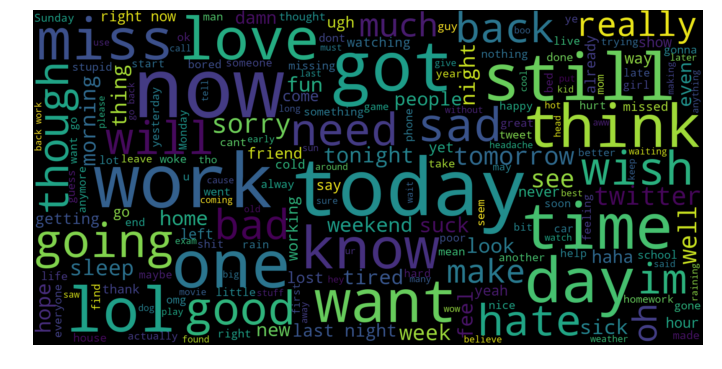

In [120]:
neg_tweets = gt_df[gt_df['class'] == 0]
neg_string = string_concat(neg_tweets['text'])
plot_wordcloud(neg_string)

##### NLTK english stopwords, Regexp tokenizer, Porter stemmer, min_len=3

###### Load stop words, initialize tokenizer

NLTK's list of English stop words is used to filter tweet text. Full list of stop words can be found [here](https://gist.github.com/sebleier/554280).

In [26]:
# load the corpus of stop words from NLTK
stop_words = stopwords.words('english')

# intialize the Regexp Tokenizer from NLTK
tokenizer = RegexpTokenizer(r'\w+')

# initialize the Porter Stemmer from NLTK
stemmer = PorterStemmer()

# set the minimum length to filter out all tokens with len < min_length
min_length = 3

###### Tokenize words, convert to lower case, exclude stop words, punctuation, len < 3, stem using Porter stemmer

Performed by calling a user-defined function `'tokenize_text'` (see definition in step 1.2)

Function's docstring contains detailed description of the process.

In [27]:
tokenize_text?

In [28]:
%%time
gt_df['words_filtered_porter'] = gt_df['text'].apply(tokenize_text)

Wall time: 1min


**Tokenized (Porter stemmer) negative tweets -- frequency of tokens**

Filtered out punctuation using Regexp Tokenizer, removed English stopwords from NLTK's list, stemmed using Porter stemmer, filter out all tokens shorter than 3 characters long.

##### NLTK english stopwords, Regexp tokenizer, Snowball stemmer, min_len=3

###### Load stop words, initialize tokenizer

NLTK's list of English stop words is used to filter tweet text. Full list of stop words can be found [here](https://gist.github.com/sebleier/554280).

In [29]:
# load the corpus of stop words from NLTK
stop_words = stopwords.words('english')

# intialize the Regexp Tokenizer from NLTK
tokenizer = RegexpTokenizer(r'\w+')

# initialize the Porter Stemmer from NLTK
stemmer = SnowballStemmer('english')

# set the minimum length to filter out all tokens with len < min_length
min_length = 3

###### Tokenize words, convert to lower case, exclude stop words, punctuation, len < 3, stem using Snowball stemmer

Performed by calling a user-defined function `'tokenize_text'` (see definition in step 1.2)

In [30]:
%%time
gt_df['words_filtered_snowball'] = gt_df['text'].apply(tokenize_text)

Wall time: 45.2 s


**Tokenized (Snowball stemmer) negative tweets -- frequency of tokens**

Filtered out punctuation using Regexp Tokenizer, removed English stopwords from NLTK's list, stemmed using Snowball stemmer, filter out all tokens shorter than 3 characters long.

**Unfiltered positive tweets -- frequency of tokens**

**Tokenized (Porter stemmer) positive tweets -- frequency of tokens**

Filtered out punctuation using Regexp Tokenizer, removed English stopwords from NLTK's list, stemmed using Porter stemmer, filter out all tokens shorter than 3 characters long.

**Tokenized (Snowball stemmer) positive tweets -- frequency of tokens**

Filtered out punctuation using Regexp Tokenizer, removed English stopwords from NLTK's list, stemmed using Snowball stemmer, filter out all tokens shorter than 3 characters long.

#### BONUS SECTION -- Duplicate entries

> Bonus section: data cleanup - twitter bots and duplicate entries

Duplicate checks have been performed with the following criteria used for detection:

* all columns (entries must match on all columns to be considered duplicated)


* each column excluded one by one from the list, check performed with the rest


* date+user+text (same date, same user, same text)


* user+text (same user, same text)


* id+text (same tweet id, same text)



**Following results were observed:**

* there are some misclassidied records -- they match in everything, but have different `'class'`


* there are some users with a much higher number of posts than the mean


* there are some twitter bots present in the dataset


* users can post duplicated tweets


**All of these records have been removed from the DataFrame to improve model accuracy**

##### Initial duplicate check

DataFrame to be checked (added columns are dropped).

In [32]:
# DataFrame without the added columns
# get a list of all the columns whose name starts with 'words'
r = re.compile(r'words*')
drop_cols = list(filter(r.match, gt_df.columns))
# add the column with hashtags
drop_cols.append('hashtags')
gt_df.drop(drop_cols, axis=1).head()

,class,id,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot - Awww, that's a bummer. You sho..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


##### Duplicate checks

Duplicate checks are performed using the function `'duplicate_check'`.

Function's docstring contains detailed description of the process.

In [33]:
duplicate_check?

Subset 'all_columns': 0 (0.00% of total 200,000) records are detected as duplicated.
Subset 'class': 209 (0.10% of total 200,000) records are detected as duplicated.
Subset 'id': 25 (0.01% of total 200,000) records are detected as duplicated.
Subset 'date': 0 (0.00% of total 200,000) records are detected as duplicated.
Subset 'user': 0 (0.00% of total 200,000) records are detected as duplicated.
Subset 'text': 0 (0.00% of total 200,000) records are detected as duplicated.
Subset 'date+user+text': 234 (0.12% of total 200,000) records are detected as duplicated.
Subset 'user+text': 709 (0.35% of total 200,000) records are detected as duplicated.
Subset 'id+text': 209 (0.10% of total 200,000) records are detected as duplicated.


,all_columns,class,id,date,user,text,date+user+text,user+text,id+text
num_duplicates,0.0,209.0000,25.0000,0.0,0.0,0.0,234.000,709.0000,209.0000
num_total,200000.0,200000.0000,200000.0000,200000.0,200000.0,200000.0,200000.000,200000.0000,200000.0000
percentage,0.0,0.1045,0.0125,0.0,0.0,0.0,0.117,0.3545,0.1045


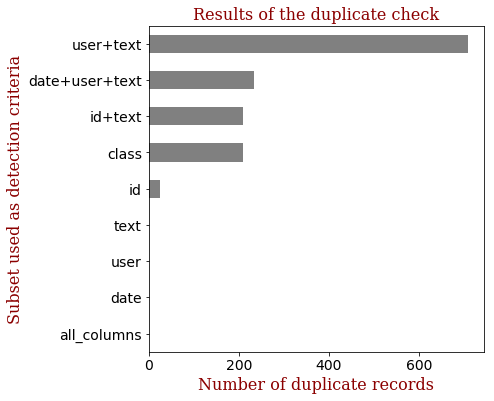

In [34]:
# duplicate check option 1: list of columns to be removed one by one from criteria
cols_to_drop = gt_df.drop(drop_cols, axis=1).columns

# duplicate check option 2: dictionary of keys with names of subsets and subsets of columns to be used as values
subsets_to_check = {
    'date+user+text': ['date', 'user', 'text'],
    'user+text': ['user', 'text'],
    'id+text': ['id', 'text']
}

# added columns 'hashtags', 'words_filtered' are excluded from the check
duplicate_check(gt_df.drop(drop_cols, axis=1), 
                cols_to_drop = cols_to_drop, 
                subsets_to_check = subsets_to_check)

While 99.9% of values in column `'id'` are unique, the remaining 209 records represent pairs of 2 tweets with the same `'id'`. 

In fact, these pairs of records match in everything, but are classified under different `'class'`.

In [35]:
# get the list of 'id's of all rows that have 2 records under the same 'id' 
ids = gt_df['id'].value_counts()[gt_df['id'].value_counts() == 2].index
mask = gt_df['id'].isin(ids)
gt_df[mask].sort_values('user').head(10)

,class,id,date,user,text,hashtags,words_filtered_porter,words_filtered_snowball
170364,4,1678361346,Sat May 02 06:27:28 PDT 2009,5freakinfriends,bout to upload Saturdays vid ...btw it sucks...,,"[bout, upload, saturday, vid, btw, suck]","[bout, upload, saturday, vid, btw, suck]"
50066,0,1678361346,Sat May 02 06:27:28 PDT 2009,5freakinfriends,bout to upload Saturdays vid ...btw it sucks...,,"[bout, upload, saturday, vid, btw, suck]","[bout, upload, saturday, vid, btw, suck]"
190359,4,1688009765,Sun May 03 10:07:32 PDT 2009,AceMas21,@Emma300 I haven't Thanks for the offer tho ...,,"[emma300, thank, offer, tho, check, amazon, us...","[emma300, thank, offer, tho, check, amazon, us..."
64298,0,1688009765,Sun May 03 10:07:32 PDT 2009,AceMas21,@Emma300 I haven't Thanks for the offer tho ...,,"[emma300, thank, offer, tho, check, amazon, us...","[emma300, thank, offer, tho, check, amazon, us..."
181514,4,1685822901,Sun May 03 02:15:58 PDT 2009,Ahsoka82,trying to get along with Twitter why I'm doin...,,"[tri, get, along, twitter]","[tri, get, along, twitter]"
58110,0,1685822901,Sun May 03 02:15:58 PDT 2009,Ahsoka82,trying to get along with Twitter why I'm doin...,,"[tri, get, along, twitter]","[tri, get, along, twitter]"
174372,4,1679985789,Sat May 02 10:38:18 PDT 2009,AjGaunt,@yjlovesjj I dno diff release dates in the U.K...,,"[yjlovesjj, dno, diff, releas, date, think, wa...","[yjlovesjj, dno, diff, releas, date, think, wa..."
52998,0,1679985789,Sat May 02 10:38:18 PDT 2009,AjGaunt,@yjlovesjj I dno diff release dates in the U.K...,,"[yjlovesjj, dno, diff, releas, date, think, wa...","[yjlovesjj, dno, diff, releas, date, think, wa..."
137241,4,1558707006,Sun Apr 19 09:10:17 PDT 2009,AmberLovesNKOTB,"@AishaNH Yea kinda, its just a 102 fever heada...",,"[aishanh, yea, kinda, 102, fever, headach, sto...","[aishanh, yea, kinda, 102, fever, headach, sto..."
26361,0,1558707006,Sun Apr 19 09:10:17 PDT 2009,AmberLovesNKOTB,"@AishaNH Yea kinda, its just a 102 fever heada...",,"[aishanh, yea, kinda, 102, fever, headach, sto...","[aishanh, yea, kinda, 102, fever, headach, sto..."


The check using all columns (with `'class'` excluded) detects 209 duplicates -- these are 209 pairs of records that are identical in everything, but one is classified as "positive", and another one as "negative".

**These records represent misclassified entries and will be removed from the dataset.**

In [36]:
# creating criteria to filter duplicates:
# all columns without 'class' and the ones that were added
cols = gt_df.drop(drop_cols + ['class'], axis=1).columns

# length before removal of duplicates
old_len = len(gt_df)

# removing duplicates using the criteria specified above
gt_df.drop_duplicates(subset=cols, inplace=True)

print("{0:,} duplicates have been removed from the DataFrame using the following match criteria:"
      .format(old_len - len(gt_df)))
print(cols)
print("{0:,} records remain in the DataFrame.".format(len(gt_df)))

209 duplicates have been removed from the DataFrame using the following match criteria:
Index(['id', 'date', 'user', 'text'], dtype='object')
199,791 records remain in the DataFrame.


##### Checking same `'user'` and `'text'`

Subset 'all_columns': 0 (0.00% of total 199,791) records are detected as duplicated.
Subset 'class': 0 (0.00% of total 199,791) records are detected as duplicated.
Subset 'id': 25 (0.01% of total 199,791) records are detected as duplicated.
Subset 'date': 0 (0.00% of total 199,791) records are detected as duplicated.
Subset 'user': 0 (0.00% of total 199,791) records are detected as duplicated.
Subset 'text': 0 (0.00% of total 199,791) records are detected as duplicated.
Subset 'date+user+text': 25 (0.01% of total 199,791) records are detected as duplicated.
Subset 'user+text': 500 (0.25% of total 199,791) records are detected as duplicated.
Subset 'id+text': 0 (0.00% of total 199,791) records are detected as duplicated.


,all_columns,class,id,date,user,text,date+user+text,user+text,id+text
num_duplicates,0.0,0.0,25.000000,0.0,0.0,0.0,25.000000,500.000000,0.0
num_total,199791.0,199791.0,199791.000000,199791.0,199791.0,199791.0,199791.000000,199791.000000,199791.0
percentage,0.0,0.0,0.012513,0.0,0.0,0.0,0.012513,0.250262,0.0


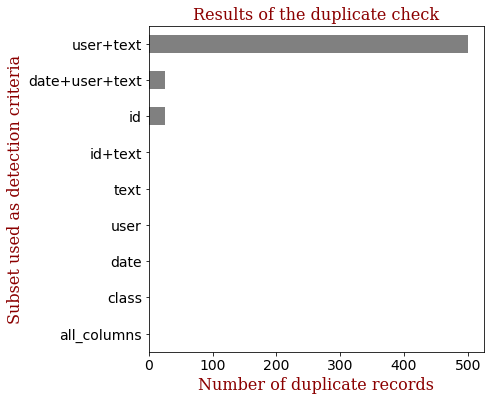

In [37]:
# duplicate check option 1: list of columns to be removed one by one from criteria
cols_to_drop = gt_df.columns.drop(drop_cols)

# duplicate check option 2: dictionary of keys with names of subsets and subsets of columns to be used as values
subsets_to_check = {
    'date+user+text': ['date', 'user', 'text'],
    'user+text': ['user', 'text'],
    'id+text': ['id', 'text']
}

# added columns 'hashtags', 'words_filtered' are excluded from the check
duplicate_check(gt_df.drop(drop_cols, axis=1), 
                cols_to_drop = cols_to_drop, 
                subsets_to_check = subsets_to_check)

**Some users have much more tweets than the majority.**

In [38]:
gt_df['user'].value_counts().describe()

count    137194.000000
mean          1.456266
std           1.783698
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         310.000000
Name: user, dtype: float64

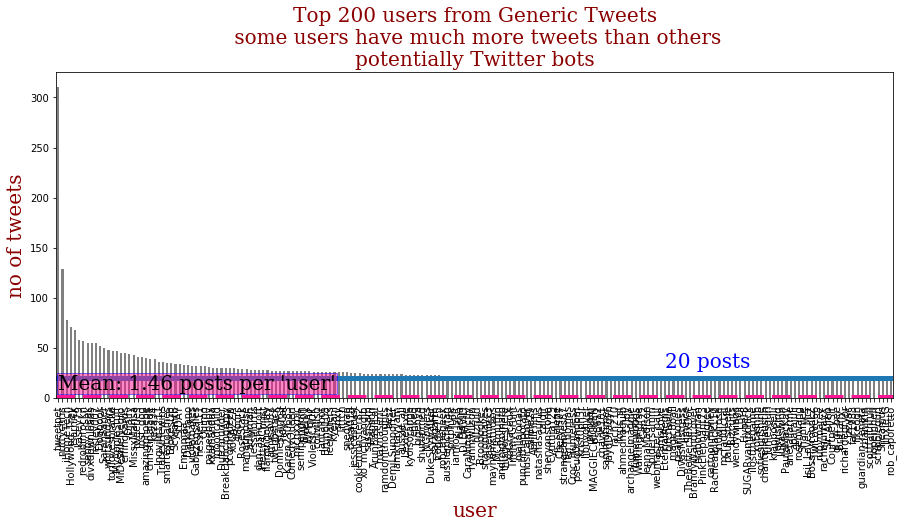

In [39]:
# create figure and axis
f, ax = plt.subplots(1, figsize=(15, 6))
font_mean = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 20,
            }

font_labels = {'family': 'serif',
               'color':  'darkred',
               'weight': 'normal',
               'size': 20,
               }

# plot value counts for top 30 users by # of records
gt_df['user'].value_counts().head(200).plot(kind='bar', color='gray', ax=ax)

# plot the mean
mean = gt_df['user'].value_counts().mean()
ax.axhline(mean, color='deeppink', linestyle='--', linewidth=5)
ax.text(0, 
        mean * 6, 
        "Mean: {0:.2f} posts per 'user'".format(mean), 
        fontdict=font_mean,
        bbox=dict(facecolor='deeppink', edgecolor='blue', pad=1.0, alpha=0.5))
ax.set_xlabel("user", fontdict=font_labels)
ax.set_ylabel("no of tweets", fontdict=font_labels)
ax.set_title("Top 200 users from Generic Tweets\n \
some users have much more tweets than others\npotentially Twitter bots", fontdict=font_labels)
ax.axhline(20, linewidth=5)
ax.text(145, 30, "20 posts", fontdict={'family': 'serif', 'color': 'blue', 'size':'20'})
plt.show()

##### large number of same tweets -- potential twitter bots

In [40]:
gt_df[gt_df['user'] == 'tweetpet']

,class,id,date,user,text,hashtags,words_filtered_porter,words_filtered_snowball
9560,0,1548797240,Fri Apr 17 22:00:01 PDT 2009,tweetpet,@tweetchild Clean Me!,,"[tweetchild, clean]","[tweetchild, clean]"
9561,0,1548797247,Fri Apr 17 22:00:01 PDT 2009,tweetpet,@tweetchild Clean Me!,,"[tweetchild, clean]","[tweetchild, clean]"
9562,0,1548797393,Fri Apr 17 22:00:02 PDT 2009,tweetpet,@chromachris Clean Me!,,"[chromachri, clean]","[chromachri, clean]"
9564,0,1548797501,Fri Apr 17 22:00:03 PDT 2009,tweetpet,@reatlas Clean Me!,,"[reatla, clean]","[reatla, clean]"
9565,0,1548797565,Fri Apr 17 22:00:03 PDT 2009,tweetpet,@chromachris Clean Me!,,"[chromachri, clean]","[chromachri, clean]"
9566,0,1548797648,Fri Apr 17 22:00:04 PDT 2009,tweetpet,@reatlas Clean Me!,,"[reatla, clean]","[reatla, clean]"
9567,0,1548797891,Fri Apr 17 22:00:06 PDT 2009,tweetpet,@reatlas hungry!,,"[reatla, hungri]","[reatla, hungri]"
12409,0,1551797396,Sat Apr 18 10:00:02 PDT 2009,tweetpet,@adlantis Clean Me!,,"[adlanti, clean]","[adlanti, clean]"
12411,0,1551797624,Sat Apr 18 10:00:03 PDT 2009,tweetpet,@tweetchild Clean Me!,,"[tweetchild, clean]","[tweetchild, clean]"
12413,0,1551797745,Sat Apr 18 10:00:04 PDT 2009,tweetpet,@chromachris Clean Me!,,"[chromachri, clean]","[chromachri, clean]"


##### Removing users with a large number of posts

Even if the large number of posts are produced by an actual user, training the model using these posts might bias the results towards these users and their text patterns, which might not repeat on the future data.

To correct for this, all the users with more than 20 posts **are removed form the DataFrame** (they represent less than 2% of the total tweets in `'generic_tweets.txt'`)

In [41]:
# set maximum posts allowed
max_posts = 20

# create the mask to subset value counts of column 'user'  
mask_counts = gt_df['user'].value_counts() > max_posts

# get user names for all users with more than 20 posts
users_many_tweets = gt_df['user'].value_counts()[mask_counts].index

# create a boolean mask for DataFrame of tweets to select all tweets belonging to these users
mask_subset = gt_df['user'].isin(users_many_tweets)
print("{0:.2f}% of the total {1:,} users have more than {2} posts."
      .format(len(gt_df[mask_subset]) / len(gt_df) * 100, 
              len(gt_df), 
              max_posts))

# drop the tweets from high frequency posting users from the DataFrame
old_len = len(gt_df)
gt_df = gt_df.drop(gt_df[mask_subset].index)
print("{0:,} records corresponding to users with more than {1} tweets have been removed from the DataFrame!"
      .format(old_len - len(gt_df), max_posts))
print("{0:,} records remaining.".format(len(gt_df)))

1.95% of the total 199,791 users have more than 20 posts.
3,898 records corresponding to users with more than 20 tweets have been removed from the DataFrame!
195,893 records remaining.


##### in addition, users post duplicated messages

In [42]:
mask = gt_df.duplicated(subset=['user', 'text'], keep=False)
gt_df[mask].sort_values('user').tail(10)

,class,id,date,user,text,hashtags,words_filtered_porter,words_filtered_snowball
137114,4,1558676547,Sun Apr 19 09:05:00 PDT 2009,xXThinkPinkX,+ today was awsome.been outside with friends. ...,,"[today, awsom, outsid, friend, sun, said, mani...","[today, awsom, outsid, friend, sun, said, mani..."
106127,4,1468770067,Tue Apr 07 03:38:31 PDT 2009,x_emma,@bradiewebbstack do you like lollipops? becaus...,,"[bradiewebbstack, like, lollipop, think, get, ...","[bradiewebbstack, like, lollipop, think, get, ..."
105779,4,1468713228,Tue Apr 07 03:19:12 PDT 2009,x_emma,@bradiewebbstack do you like lollipops? becaus...,,"[bradiewebbstack, like, lollipop, think, get, ...","[bradiewebbstack, like, lollipop, think, get, ..."
49522,0,1678173032,Sat May 02 05:47:22 PDT 2009,xthismodernlove,Hate saturdays at work. Always eat too much ju...,,"[hate, saturday, work, alway, eat, much, junk,...","[hate, saturday, work, alway, eat, much, junk,..."
49521,0,1678173012,Sat May 02 05:47:21 PDT 2009,xthismodernlove,Hate saturdays at work. Always eat too much ju...,,"[hate, saturday, work, alway, eat, much, junk,...","[hate, saturday, work, alway, eat, much, junk,..."
100831,4,1467971793,Mon Apr 06 23:03:31 PDT 2009,zottarella,Lets Drop ..Ich hatte gerade K�se auf Toast. G...,,"[let, drop, ich, hatt, gerad, auf, toast, germ...","[let, drop, ich, hatt, gerad, auf, toast, germ..."
101982,4,1468163004,Tue Apr 07 00:03:33 PDT 2009,zottarella,Lets Drop ..Ich hatte gerade K�se auf Toast. G...,,"[let, drop, ich, hatt, gerad, auf, toast, germ...","[let, drop, ich, hatt, gerad, auf, toast, germ..."
110603,4,1469816859,Tue Apr 07 07:30:20 PDT 2009,zottarella,Lets Drop ..Ich hatte gerade K�se auf Toast. G...,,"[let, drop, ich, hatt, gerad, auf, toast, germ...","[let, drop, ich, hatt, gerad, auf, toast, germ..."
171224,4,1678604191,Sat May 02 07:12:54 PDT 2009,zyozyfounder,"@GabrielRossi this is so brilliant, I'm going ...",,"[gabrielrossi, brilliant, retweet]","[gabrielrossi, brilliant, retweet]"
171223,4,1678604157,Sat May 02 07:12:54 PDT 2009,zyozyfounder,"@GabrielRossi this is so brilliant, I'm going ...",,"[gabrielrossi, brilliant, retweet]","[gabrielrossi, brilliant, retweet]"


##### To correct for both, duplicated messages for the same `'user'` with the same `'text'` are removed from the DataFrame

In [43]:
old_len = len(gt_df)
gt_df = gt_df.drop_duplicates(subset=['user', 'text'])
print("{0:,} records corresponding to duplicate 'user' and 'text' have been removed from the DataFrame!"
      .format(old_len - len(gt_df)))
print("{0:,} records remaining.".format(len(gt_df)))

237 records corresponding to duplicate 'user' and 'text' have been removed from the DataFrame!
195,656 records remaining.


##### Verification of results

Subset 'all_columns': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'class': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'id': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'date': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'user': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'text': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'date+user+text': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'user+text': 0 (0.00% of total 195,656) records are detected as duplicated.
Subset 'id+text': 0 (0.00% of total 195,656) records are detected as duplicated.


,all_columns,class,id,date,user,text,date+user+text,user+text,id+text
num_duplicates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_total,195656.0,195656.0,195656.0,195656.0,195656.0,195656.0,195656.0,195656.0,195656.0
percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


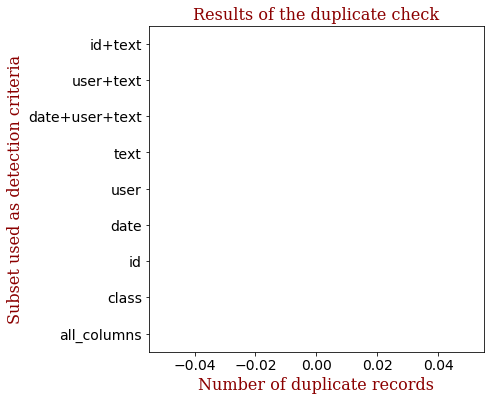

In [44]:
cols_to_drop = gt_df.columns.drop(drop_cols)
subsets_to_check = {
    'date+user+text': ['date', 'user', 'text'],
    'user+text': ['user', 'text'],
    'id+text': ['id', 'text']
}

# added column text_len' is excluded from the check
duplicate_check(gt_df.drop(drop_cols, axis=1), 
                cols_to_drop = cols_to_drop, 
                subsets_to_check = subsets_to_check)

There are no more duplicate entries in the dataset.

### U.S. airline dataset

Description of the dataset:

The second data set, US_airline_tweets.txt, contains a list of tweets regarding several US airlines. The comma-separated fields of each line are:

0 id the id of the tweet  
1 sentiment can be “positive” or “negative”  
2 negative_reason reason for negative tweets. Left blank for positive tweets.  
3 user the user that tweeted  
4 retweet_count number of retweets  
5 text the text of the tweet

In [45]:
at_df.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


#### Consistency of data

##### US airline tweets --  column `'id'`

`'id'` -- id of the tweet  

Only 20.34% of records in `'US_airline_tweets.txt'` contain unique values.

In [46]:
unique_values(at_df['id'])

Out of the total 11,541 records in column 'id', 2,348(20.34%) have unique values.

Value counts for column 'id':
5.696040e+17    25
5.696270e+17    24
5.696710e+17    22
5.696670e+17    22
5.696200e+17    21
5.696990e+17    21
5.696230e+17    20
5.696600e+17    20
5.696220e+17    20
5.703070e+17    20
5.696210e+17    19
5.696420e+17    19
5.696060e+17    19
5.696330e+17    19
5.702810e+17    19
5.696620e+17    18
5.696760e+17    18
5.702720e+17    18
5.696030e+17    17
5.696720e+17    17
5.696080e+17    17
5.695920e+17    17
5.698800e+17    17
5.696660e+17    17
5.702760e+17    17
5.696190e+17    17
5.699510e+17    17
5.696510e+17    17
5.702710e+17    16
5.696470e+17    16
                ..
5.686380e+17     1
5.688560e+17     1
5.682700e+17     1
5.689340e+17     1
5.697690e+17     1
5.686000e+17     1
5.676270e+17     1
5.677030e+17     1
5.687400e+17     1
5.688480e+17     1
5.687490e+17     1
5.698290e+17     1
5.687170e+17     1
5.687660e+17     1
5.684990e+17     1
5.682810e+17 

Many records under the same `'id'` represent tweets that have little in common:

In [47]:
mask = at_df['id'] == at_df['id'].value_counts().index[0]
at_df[mask].head(10)

,id,sentiment,negative_reason,user,retweet_count,text
1372,5.696040e+17,negative,Lost Luggage,UK_Petrolhead,1,@united Your baggage tracking system is worthl...
1373,5.696040e+17,negative,Bad Flight,krisrice,0,@United is offering to reroute my SFO flight t...
3912,5.696040e+17,negative,Flight Booking Problems,dflindzy_david,0,@SouthwestAir ridiculous how you want to charg...
3913,5.696040e+17,positive,NaN,HybridMovementC,0,@SouthwestAir Mad love http://t.co/4ojrSDWPkK...
5637,5.696040e+17,negative,Bad Flight,arthurhasher,0,@JetBlue You left 175 PEOPLE on a hot plane wi...
5638,5.696040e+17,negative,Late Flight,ItsChristine_x,0,@JetBlue at what point in delays can I take a ...
5639,5.696040e+17,positive,NaN,djchupy,0,@JetBlue thank you guys! You are the best! ðŸ™...
5640,5.696040e+17,negative,Can't Tell,arthurhasher,0,@JetBlue You just don't get it. It's not abou...
7544,5.696040e+17,negative,Customer Service Issue,therealkellyd,0,@USAirways wasted a day of my vacation after p...
7545,5.696040e+17,negative,Flight Attendant Complaints,KoilsByNature,0,@USAirways it's unacceptable the way your agen...


Therefore, column `'id'` in `'US_airline_tweets.txt'` appears to be meaningless and **will be removed form the dataframe**.

In [48]:
at_df = at_df.drop('id', axis=1)
at_df.head()

,sentiment,negative_reason,user,retweet_count,text
0,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


##### US airline tweets -- column `'sentiment'`

`'sentiment'` -- can be “positive” or “negative”  

There are 2'363 positive and 9'178 negative tweets in the dataset `'generic_tweets.txt'`:

In [49]:
at_df['sentiment'].value_counts()

negative    9178
positive    2363
Name: sentiment, dtype: int64

**US airline tweets dataset is not balanced:** 

there are 3.88 times more negative than positive tweets.

In [50]:
print("There are {0:.2f} times more negative than positive tweets in 'US_airline_tweets.txt'"
      .format(at_df['sentiment'].value_counts().loc['negative'] 
              / at_df['sentiment'].value_counts().loc['positive']))

There are 3.88 times more negative than positive tweets in 'US_airline_tweets.txt'


##### US airline tweets -- column `'negative_reason'`

`'negative_reason'` -- reason for negative tweets. Left blank for positive tweets.

Values in `'negative_reason'` appear to be consistent.

In [51]:
print("There are {0} tweets with 'negative' sentiment that are missing the value of 'negative_reason'."
      .format(len(at_df.query('sentiment == "negative"')) - at_df['negative_reason'].notna().sum()))
at_df['negative_reason'].value_counts()

There are 0 tweets with 'negative' sentiment that are missing the value of 'negative_reason'.


Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

##### US airline tweets -- column `'retweet_count'`

`'retweet_count'` -- number of retweets  

Most tweets have 0 `'retweet_count'`, there are only 7 records with more than 10 retweets ("mild" outliers).

Values appear to be consistent, there are no unreasonable outliers.

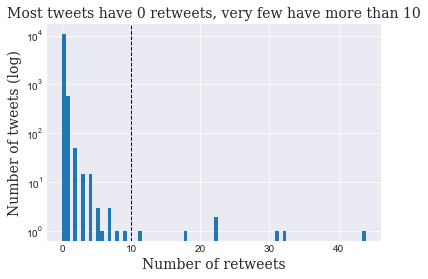

In [52]:
with plt.style.context(('seaborn-darkgrid')):
    font = {'family': 'serif', 'size': 14}
    f, ax = plt.subplots(1)
    at_df['retweet_count'].hist(bins=80, ax=ax)
    ax.set_yscale('log')
    ax.set_ylabel("Number of tweets (log)", fontdict=font)
    ax.set_xlabel("Number of retweets", fontdict=font)
    ax.set_title("Most tweets have 0 retweets, very few have more than 10", fontdict=font)
    ax.axvline(10, color='black', linestyle='--', linewidth=1)
    plt.show()

There are only 7 records with more than 10 retweets:

In [53]:
at_df[at_df['retweet_count'] > 10].sort_values('retweet_count', ascending=False)

,sentiment,negative_reason,user,retweet_count,text
8988,negative,Late Flight,OBJ_3,44,@USAirways 5 hr flight delay and a delay when ...
8975,negative,Can't Tell,OBJ_3,32,@USAirways of course never again tho . Thanks ...
5407,negative,Can't Tell,TatianaKing,31,STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY....
4407,positive,NaN,seattlefordguy,22,@SouthwestAir beautiful day in Seattle! http:/...
5396,negative,Can't Tell,TheBuie,22,can you not? RT @JetBlue Our fleet's on fleek....
5363,negative,Can't Tell,AbeFroman,18,"Just in case you needed confirmation that ""on ..."
5647,positive,NaN,OlivierGachot,11,@JetBlue what a great experience on flight fro...


Column `'user'` will be investigated in **BONUS SECTION -- Duplicate entries**.

#### Data types and missing values

All data types are detected correctly:

* Most of the columns are of type `object`, which typically means they are strings. 
    
    * columns `'sentiment'` and `'negative_reason'` contain categorical data, and could be converted to `category` data type. But in case of this data set, such conversion would not result in a significant memory savings, and thus it hasn't been performed.
    
* columns `'retweet_count'` is `int` for integer
    * it has a 64 at the end of it, which means it can be up to 64 bits long.

There are no unexpectedly missing values in `'us_airline_tweets.txt'` (values of `'negative_reason'` are missing for positive reviews).

In [54]:
at_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 5 columns):
sentiment          11541 non-null object
negative_reason    9178 non-null object
user               11541 non-null object
retweet_count      11541 non-null int64
text               11541 non-null object
dtypes: int64(1), object(4)
memory usage: 450.9+ KB


#### Replacing HTML character codes

Replacing '<3' with 'love':

In [55]:
at_df['text'] = at_df['text'].str.replace("&lt;3", 'love')
print("Done!")

Done!


HTML character codes:

* &quot;
* &amp;
* &lt;
* &gt;

In [56]:
# replacing HTML character codes with their ASCII equivalents
at_df['text'] = at_df['text'].str.replace("&quot;", '"')
at_df['text'] = at_df['text'].str.replace("&amp;", '&')
at_df['text'] = at_df['text'].str.replace("&lt;", '<')
at_df['text'] = at_df['text'].str.replace("&gt;", '>')
print("HTML character codes replaced with their ASCII equivalent in the DataFrame 'gt_df'!")

HTML character codes replaced with their ASCII equivalent in the DataFrame 'gt_df'!


Removing emoji:

In [57]:
at_df['text'] = at_df['text'].str.replace('ð', '')
at_df['text'] = at_df['text'].str.replace('Ÿ', '')
"Emoji removed from the DataFrame!"

'Emoji removed from the DataFrame!'

#### Extracting hashtags from tweets

In [58]:
%time at_df['hashtags'] = at_df['text'].apply(lambda text: " ".join(re.findall(r'#\w+', text)))
print("Hashtags have been extracted into a new column 'hashtags' of the DataFrame!")

Wall time: 42 ms
Hashtags have been extracted into a new column 'hashtags' of the DataFrame!


##### Top 10 hashtags by frequency in `'generic_tweets'`:

In [59]:
# concatenate hashtags from all tweets together, convert to lower case, split by ' ', save to a pandas Series 
at_all_hashtags_se = pd.Series(at_df['hashtags'].str.cat(sep=" ").lower().split())

print("Top 10 user hashtags by frequency:\n")
print(at_all_hashtags_se.value_counts().head(10))

Top 10 user hashtags by frequency:

#fail                  69
#jetblue               46
#unitedairlines        41
#customerservice       36
#destinationdragons    31
#usairways             29
#neveragain            27
#united                26
#usairwaysfail         25
#americanairlines      25
dtype: int64


Negative hashtags: 

#fail #neveragain #usairwaysfail #disappointed #badservice #badcustomerservice #frustrated #nothappy
#epicfail #poorservice #unfriendlyskies #unacceptable #ridiculous #wtf #unitedsucks #cancelled #worstairlineever #delayed #unitedfail #worst #worstcustomerservice #usairwayssucks #stranded #shameful #pathetic #poorcustomerservice
#getittogether #customerservicefail #worstairline #poor

Airline hashtags: 

#jetblue #unitedairlines #usairways #united #americanairlines #southwestairlines #swa

There are barely any common positive hashtags

#### Extracting user handles (@someone) from tweet texts

In [60]:
%time at_df['handles'] = at_df['text'].apply(lambda text: " ".join(re.findall(r'@\w+', text)))
print("User handles (@) from tweet 'text' have been extracted into a new column 'handles' of the DataFrame!")

Wall time: 49 ms
User handles (@) from tweet 'text' have been extracted into a new column 'handles' of the DataFrame!


##### Top 10 handles by frequency in US Airline tweets:

In [61]:
# concatenate @handles from all tweets together, convert to lower case, split by ' ', save to a pandas Series 
at_all_handles_se = pd.Series(at_df['handles'].str.cat(sep=" ").lower().split())

print("Top 10 user handles from text (@) by frequency:\n")
print(at_all_handles_se.value_counts().head(10))

Top 10 user handles from text (@) by frequency:

@united            3191
@usairways         2607
@americanair       2462
@southwestair      1788
@jetblue           1519
@virginamerica      344
@delta               60
@phlairport          17
@imaginedragons      17
@dfwairport          12
dtype: int64


#### Removing links from tweets

In [62]:
mask = at_df['text'].str.contains('http')
print("{0:,} records contain 'http' in 'text'.\n".format(len(at_df[mask])))
for i in np.arange(10): print(at_df.loc[mask, 'text'].iloc[i])

677 records contain 'http' in 'text'.

@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn
@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA
@VirginAmerica this is great news!  America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews
@VirginAmerica Your chat support is not working on your site: http://t.co/vhp2GtDWPk
@VirginAmerica View of downtown Los Angeles, the Hollywood Sign, and beyond that rain in the mountains! http://t.co/Dw5nf0ibtr
@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV
@VirginAmerica your airline is awesome but your lax loft needs to step up its game. $40 for dirty tables and floors? http://t.co/hy0VrfhjHt
@VirginAmerica Iâ€™m having trouble adding this flight my wife booked to my Elevate account. Help? http://t.co/pX8hQOKS3R
@VirginAmerica I can't check in or add a

##### Removing the links

In [63]:
%time at_df['text'] = at_df['text'].apply(lambda text: re.sub(r'http\S+', '', text))
print("Links have been removed from the column 'text' of the DataFrame!")

Wall time: 40.1 ms
Links have been removed from the column 'text' of the DataFrame!


##### Verification of results

In [64]:
mask = at_df['text'].str.contains('http')
print("{0:,} records contain 'http' in 'text'.\n".format(len(at_df[mask])))
for i in np.arange(sum(mask)): print(at_df.loc[mask, 'text'].iloc[i])

0 records contain 'http' in 'text'.



#### Tokenizing, removing stop words and punctuation, stemming

##### NLTK english stopwords, Regexp tokenizer, Porter stemmer, min_len=3

###### Load stop words, initialize tokenizer

In [65]:
# load the corpus of stop words
cached_stop_words = stopwords.words('english')

# intialize the Regexp Tokenizer from NLTK
tokenizer = RegexpTokenizer(r'\w+')

# initialize the Porter Stemmer from NLTK
stemmer = PorterStemmer()

# set the minimum length to filter out all tokens with len < min_length
min_length = 3

###### Tokenize words, convert to lower case, exclude stop words, punctuation, len < 3, stem using Porter stemmer

Performed by calling a user-defined function `'tokenize_text'` (see definition above)

Function's docstring contains detailed description of the process.

In [66]:
tokenize_text?

In [67]:
%%time
at_df['words_filtered_porter'] = at_df['text'].apply(tokenize_text)

Wall time: 5.67 s


##### NLTK english stopwords, Regexp tokenizer, Snowball stemmer, min_len=3

###### Load stop words, initialize tokenizer

In [68]:
# load the corpus of stop words
cached_stop_words = stopwords.words('english')

# intialize the Regexp Tokenizer from NLTK
tokenizer = RegexpTokenizer(r'\w+')

# initialize the Porter Stemmer from NLTK
stemmer = SnowballStemmer('english')

# set the minimum length to filter out all tokens with len < min_length
min_length = 3

###### Tokenize words, convert to lower case, exclude stop words, punctuation, len < 3, stem using Porter stemmer

Performed by calling a user-defined function `'tokenize_text'` (see definition above)

Function's docstring contains detailed description of the process.

In [69]:
%%time
at_df['words_filtered_snowball'] = at_df['text'].apply(tokenize_text)

Wall time: 4.2 s


In [70]:
at_df.head()

,sentiment,negative_reason,user,retweet_count,text,hashtags,handles,words_filtered_porter,words_filtered_snowball
0,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,,@VirginAmerica,"[virginamerica, plu, commerci, experi, tacki]","[virginamerica, plus, commerci, experi, tacki]"
1,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,,@VirginAmerica,"[virginamerica, realli, aggress, blast, obnoxi...","[virginamerica, realli, aggress, blast, obnoxi..."
2,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,,@VirginAmerica,"[virginamerica, realli, big, bad, thing]","[virginamerica, realli, big, bad, thing]"
3,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,,@VirginAmerica,"[virginamerica, serious, would, pay, flight, s...","[virginamerica, serious, would, pay, flight, s..."
4,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",,@VirginAmerica,"[virginamerica, nearli, everi, time, fli, œear...","[virginamerica, yes, near, everi, time, fli, œ..."


#### BONUS SECTION -- Duplicate entries

> Bonus section: data cleanup - twitter bots and duplicate entries

Duplicate checks have been performed with the following criteria used for detection:

* all columns (entries must match on all columns to be considered duplicated)


* each column excluded one by one from the list, check performed with the rest


* date+user+text (same date, same user, same text)


* user+text (same user, same text)


* id+text (same tweet id, same text)



**Following results were observed:**

* there are some misclassidied records -- they match in everything, but have different `'class'`


* there are some users with a much higher number of posts than the mean


* there are some twitter bots present in the dataset


* users can post duplicated tweets


**All of these records have been removed from the DataFrame to improve model accuracy**

##### Initial duplicate check

In [71]:
# DataFrame without the added columns
# get a list of all the columns whose name starts with 'words'
r = re.compile(r'words*')
drop_cols = list(filter(r.match, gt_df.columns))
# add the column with hashtags
drop_cols += ['hashtags', 'handles']
at_df.drop(drop_cols, axis=1).head()

,sentiment,negative_reason,user,retweet_count,text
0,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


Subset 'all_columns': 86 (0.75% of total 11,541) records are detected as duplicated.
Subset 'sentiment': 86 (0.75% of total 11,541) records are detected as duplicated.
Subset 'negative_reason': 115 (1.00% of total 11,541) records are detected as duplicated.
Subset 'user': 127 (1.10% of total 11,541) records are detected as duplicated.
Subset 'retweet_count': 86 (0.75% of total 11,541) records are detected as duplicated.
Subset 'text': 2,418 (20.95% of total 11,541) records are detected as duplicated.
Subset 'user+text': 119 (1.03% of total 11,541) records are detected as duplicated.


,all_columns,sentiment,negative_reason,user,retweet_count,text,user+text
num_duplicates,86.000000,86.000000,115.000000,127.000000,86.000000,2418.000000,119.000000
num_total,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000
percentage,0.745169,0.745169,0.996447,1.100425,0.745169,20.951391,1.031106


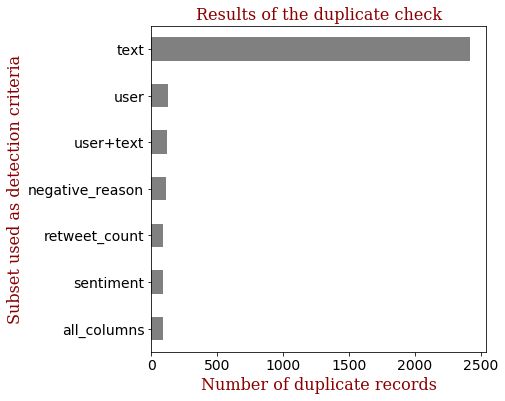

In [72]:
# duplicate check option 1: list of columns to be removed one by one from criteria
cols_to_drop = at_df.drop(drop_cols, axis=1).columns

# duplicate check option 2: dictionary of keys with names of subsets and subsets of columns to be used as values
subsets_to_check = {'user+text': ['user', 'text']}

# added columns 'hashtags', 'words_filtered', and 'handles' are excluded from the check
duplicate_check(at_df.drop(drop_cols, axis=1), 
                cols_to_drop = cols_to_drop, 
                subsets_to_check = subsets_to_check)

**86 records match on all columns and will be removed from the DataFrame**

In [73]:
# creating criteria to filter duplicates: all columns (without the added ones)
cols = at_df.columns.drop(drop_cols)

# length before removal of duplicates
old_len = len(at_df)

# removing duplicates using the criteria specified above
at_df.drop_duplicates(subset=cols, inplace=True)

print("{0:,} duplicates have been removed from the DataFrame using the following match criteria:"
      .format(old_len - len(at_df)))
print(cols)
print("{0:,} records remain in the DataFrame.".format(len(at_df)))

86 duplicates have been removed from the DataFrame using the following match criteria:
Index(['sentiment', 'negative_reason', 'user', 'retweet_count', 'text'], dtype='object')
11,455 records remain in the DataFrame.


**There are no signs of spam or twitter bots in US airline tweets dataset**

In [74]:
at_df['user'].value_counts().describe()

count    6431.000000
mean        1.781216
std         1.695808
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        28.000000
Name: user, dtype: float64

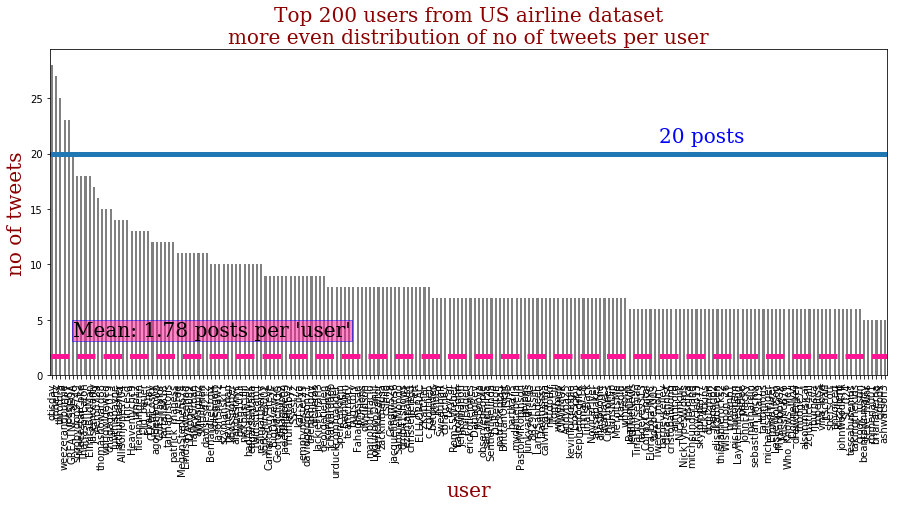

In [75]:
# create figure and axis
f, ax = plt.subplots(1, figsize=(15, 6))
font_mean = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 20,
            }

font_labels = {'family': 'serif',
               'color':  'darkred',
               'weight': 'normal',
               'size': 20,
               }

# plot value counts for top 30 users by # of records
at_df['user'].value_counts().head(200).plot(kind='bar', color='gray', ax=ax)

# plot the mean
mean = at_df['user'].value_counts().mean()
ax.axhline(mean, color='deeppink', linestyle='--', linewidth=5)
ax.text(5, 
        mean * 2, 
        "Mean: {0:.2f} posts per 'user'".format(mean), 
        fontdict=font_mean,
        bbox=dict(facecolor='deeppink', edgecolor='blue', pad=1.0, alpha=0.5))
ax.set_xlabel("user", fontdict=font_labels)
ax.set_ylabel("no of tweets", fontdict=font_labels)
ax.set_title("Top 200 users from US airline dataset\nmore even distribution of no of tweets per user", 
             fontdict=font_labels)
ax.axhline(20, linewidth=5)
ax.text(145, 21, "20 posts", fontdict={'family': 'serif', 'color': 'blue', 'size':'20'})
plt.show()

There are no more major groups of duplicate entries in the US airline tweets dataset.

## Exploratory analysis

### Sanity check -- length of `'text'` column:

#### Length of tweets in General tweets data set

Length of values in column `'text'` of `'general_tweets.txt'` appears to be resonable -- all values are under 140 symbols (max allowed length of a tweet at the time of original tweet posting).

count    195656.000000
mean         72.512946
std          35.931965
min           6.000000
25%          43.000000
50%          68.000000
75%         101.000000
max         143.000000
Name: text_len, dtype: float64


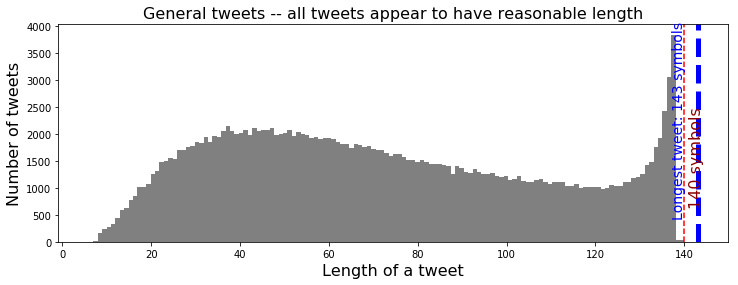

In [76]:
# add a new column with length of strings in 'text' to the DataFrame with generic tweets
gt_df['text_len'] = gt_df['text'].str.len()

# print summary statistics
print(gt_df['text_len'].describe())

# plot histogram of values
# create figure and axis
f, ax = plt.subplots(1, figsize=(12, 4))

# plot a histogram of 'text_len'
gt_df['text_len'].hist(bins=138, color='gray')

# draw supplementary lines -- 140 symbols, longest tweet in the dataset
font = {'size': 16}
ax.axvline(140, color='red', linestyle='--', )
ax.text(141, 
        2300, 
        "140 symbols", 
        rotation=90, 
        color='darkred', 
        fontdict=font)

ax.axvline(gt_df['text_len'].max(), color='blue', linestyle='--', linewidth=5)
ax.text(gt_df['text_len'].max() * 0.96, 
        3900, 
        "Longest tweet: {0} symbols".format(gt_df['text_len'].max()), 
        rotation=90, 
        color='blue', 
        fontdict={'size': 14})

# set axis parameters
ax.set_title("General tweets -- all tweets appear to have reasonable length", fontdict=font)
ax.set_xlabel("Length of a tweet", fontdict=font)
ax.set_ylabel("Number of tweets", fontdict=font)
ax.grid(False)
plt.show()

##### Several tweets exceed 140 character limit because "<3" was replaced with "love" in section 2.1.2

In [77]:
subset = gt_df.loc[gt_df['text_len'] > 140, 'text']
for i in np.arange(min([10, len(subset)])): print(subset.iloc[i])

@storycorey Hey love I gotta go offline now, get sleep and stuff  But we can totally call tomorrow or something? ILY, congrats on the Mac love
Goodnight twitterverse thanks for your kind thoughts @makemebad35 thanks! love @keithfries well thats good to know i thought you did  love3 u
@zandraisabelle morning hun. love333333 aww.. too bad.  I'm here for you. love same here. I woke up by only feeling pain i my head. :/ ily love
@ddlovato Hi Demiii! Are you having fun?  Love you so much! love By a girl that can't wait to see you here in Italy, if you'll come..! lovelove


#### Length of tweets in US airline tweets data set

Length of values in column `'text'` of `'US_airline_tweets.csv'` appears to be resonable -- all values are under 140 symbols (max allowed length of a tweet at the time of original tweet posting).

count    11455.000000
mean       106.883282
std         34.670319
min         12.000000
25%         83.000000
50%        118.000000
75%        136.000000
max        182.000000
Name: text_len, dtype: float64


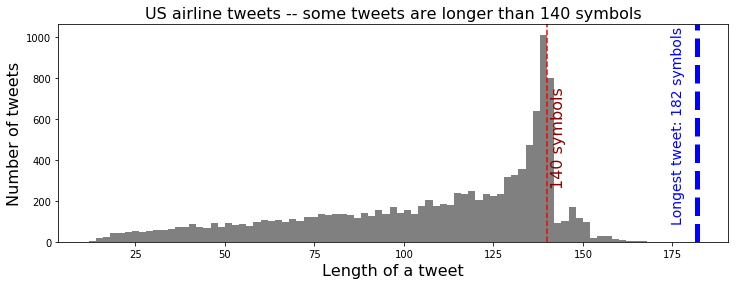

In [78]:
# add a new column with length of strings in 'text' to the DataFrame with generic tweets
at_df['text_len'] = at_df['text'].str.len()

# print summary statistics
print(at_df['text_len'].describe())

# plot histogram of values
# create figure and axis
f, ax = plt.subplots(1, figsize=(12, 4))

# plot a histogram of 'text_len'
at_df['text_len'].hist(bins=85, color='gray')

# draw supplementary lines -- 140 symbols, longest tweet in the dataset
font = {'size': 16}
ax.axvline(140, color='red', linestyle='--', )
ax.text(141, 
        700, 
        "140 symbols", 
        rotation=90, 
        color='darkred', 
        fontdict=font)

ax.axvline(at_df['text_len'].max(), color='blue', linestyle='--', linewidth=5)
ax.text(at_df['text_len'].max() * 0.96, 
        1000, 
        "Longest tweet: {0} symbols".format(at_df['text_len'].max()), 
        rotation=90, 
        color='blue', 
        fontdict={'size': 14})

# set axis parameters
ax.set_title("US airline tweets -- some tweets are longer than 140 symbols", fontdict=font)
ax.set_xlabel("Length of a tweet", fontdict=font)
ax.set_ylabel("Number of tweets", fontdict=font)
ax.grid(False)
plt.show()

##### Some tweets have length over 140 symbols

Presumably, these tweets must have been recorded after the date when Twitter [stopped counting usernames in replies](https://www.recode.net/2017/3/30/15116794/twitter-longer-tweets-140-character-limit-username-reply) towards the 140 character limit.

In [79]:
subset = at_df.loc[at_df['text_len'] > 140, 'text']
for i in np.arange(10): print(i, ':', subset.iloc[i])

0 : @VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems ˜¢
1 : @VirginAmerica I have no interesting flying with you after this. I will Cancelled Flight my next four flights I planned.#neverflyvirginforbusiness
2 : @VirginAmerica I like the TV and interesting video . Just disappointed in Cancelled Flightled flight when other flights went out to jfk on Saturday .
3 : @VirginAmerica just landed in LAX, an hour after I should of been here. Your no Late Flight bag check is not business travel friendly #nomorevirgin
4 : @VirginAmerica why must a traveler miss a flight to Late Flight check a bag?  I missed my morning appointments and you lost my business. #sfo2lax
5 : @VirginAmerica your no Late Flight bag check just lost you my business. I missed flight and AM apt. Three other people on flight had same exp.
6 : @VirginAmerica I paid the premium to fly you across the country, you Cancelled F

#### Relationship between `'negative_reason'` and `'retweet_count'`

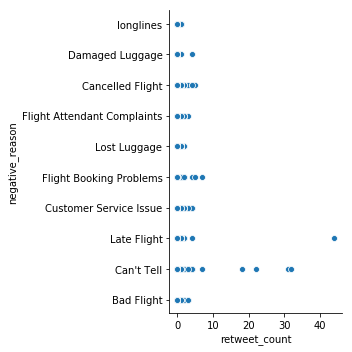

In [80]:
sns.relplot(data=at_df, x='retweet_count', y='negative_reason')

### Tweets about US Airways

In [81]:
at_df['handles'].value_counts()

@united                                                            2789
@USAirways                                                         2150
@AmericanAir                                                       1938
@SouthwestAir                                                      1550
@JetBlue                                                           1325
@VirginAmerica                                                      288
@USAirways @AmericanAir                                             112
@United                                                              88
@usairways                                                           64
@AmericanAir @USAirways                                              39
@jetblue                                                             30
@southwestair                                                        27
@americanair                                                         22
@AmericanAir @united                                            

negative    75
positive     4
Name: sentiment, dtype: int64


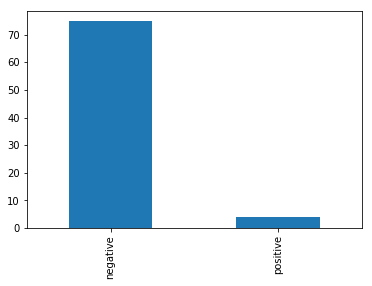

In [82]:
data_to_plot = at_df.loc[at_df['handles'].str.contains('@usairways'), 'sentiment'].value_counts()
print(data_to_plot)
data_to_plot.plot(kind='bar')

## Preparing model features

### Vectorization

From [scikit-learn documentation](https://scikit-learn.org/stable/modules/feature_extraction.html):

A corpus of documents can be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

The general process of turning a collection of text documents into numerical feature vectors is called **vectorization**.

One of the specific strategies of tokenizing, counting, and normalization is called the **Bag of Words** or **Bag of n-grams** representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

From [Applied Text Analysis with Python by Tony Ojeda, Rebecca Bilbro, Benjamin Bengfort](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html):

To vectorize a corpus with a bag-of-words (BOW) approach, we represent every document from the corpus as a vector whose length is equal to the vocabulary of the corpus. We can simplify the computation by sorting token positions of the vector into alphabetical order. Alternatively, we can keep a dictionary that maps tokens to vector positions. Either way, we arrive at a vector mapping of the corpus that enables us to uniquely represent every document.

#### Sparsity

From [scikit-learn documentation](https://scikit-learn.org/stable/modules/feature_extraction.html):

As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 200,000 short text documents (such as tweets) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 30 to 60 unique words individually.

In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector, implementations will typically use a sparse representation such as the implementations available in the `scipy.sparse` package.

#### Elements of each document vector

The choice of a specific vectorization technique will be largely driven by the problem space. There are several choices  available as to what should each element in the document (tweet) vector be, such as:

* **frequency**

* **one-hot**

* **TF-IDF**

* **distributed representations**

### Frequency vectors

From [Applied Text Analysis with Python by Tony Ojeda, Rebecca Bilbro, Benjamin Bengfort](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html):

The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document. In this encoding scheme, each document is represented as the multiset of the tokens that compose it and the value for each word position in the vector is its count. This representation can either be a straight count (integer) encoding or a normalized encoding where each word is weighted by the total number of words in the document.

#### Frequency vectors using `NLTK`

`NLTK` expects features as a `dict` object whose keys are the names of the features and whose values are boolean or numeric. To encode our documents in this way, we define a `vectorize` function that creates a dictionary whose keys are the tokens in the document and whose values are the number of times that token appears in the document.

The `defaultdict` object allows us to specify what the dictionary will return for a key that hasn’t been assigned to it yet. By setting `defaultdict(int)` we are specifying that a 0 should be returned, thus creating a simple counting dictionary. We can map this function to every item in the corpus using the last line of code, creating an iterable of vectorized documents.

In [83]:
from collections import defaultdict

def vectorize_f(text):
    """ function to turn tokens into dict 'word': count """
    features = defaultdict(int)
    for token in text:
        features[token] += 1
    return features

gt_df['vector_freq_porter'] = \
    gt_df['words_filtered_porter'].apply(vectorize_f)

gt_df['vector_freq_snowball'] = \
    gt_df['words_filtered_snowball'].apply(vectorize_f)

In [87]:
gt_df.loc[0, 'vector_freq_porter']

defaultdict(int,
            {'switchfoot': 1,
             'awww': 1,
             'bummer': 1,
             'shoulda': 1,
             'got': 1,
             'david': 1,
             'carr': 1,
             'third': 1,
             'day': 1})

In [88]:
gt_df.loc[0, 'vector_freq_snowball']

defaultdict(int,
            {'switchfoot': 1,
             'awww': 1,
             'bummer': 1,
             'shoulda': 1,
             'got': 1,
             'david': 1,
             'carr': 1,
             'third': 1,
             'day': 1})

#### Frequency vectors using `Scikit-Learn`

The `CountVectorizer` transformer from the `sklearn.feature_extraction` model has its own internal tokenization and normalization methods. The `fit` method of the `vectorizer` expects an iterable or list of strings or file objects, and **creates a dictionary of the vocabulary** on the corpus. When `transform` is called, **each individual document is transformed into a sparse array** whose index tuple is the row (the document ID) and the token ID from the dictionary, and whose value is the count:

In [129]:
CountVectorizer?

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(strip_accents='unicode',
                             stop_words='english',
                             max_df=0.9,
                             min_df=0.01)

vectors_f = vectorizer.fit(gt_df['text'])

#### Composing a term frequency matrix using `CountVectorizer`

An instance of `CountVectorizer` is initialized inside this function using supplied parameters.

In [181]:
tfm_2class(gt_df, 'class', [0, 4], 'text')

,neg_tf,pos_tf,total,abs_diff
awesome,466,1782,2248,1316
bad,2529,703,3232,1826
bed,1921,1438,3359,483
better,1316,1559,2875,243
come,1526,1414,2940,112
day,5801,5422,11223,379
days,1263,1015,2278,248
did,1610,1492,3102,118
didn,1878,696,2574,1182
doing,1149,1052,2201,97


In [180]:
tfm_2class(gt_df, 'class', [0, 4], 'text', 
           return_type='dtr')

0.2356739406305208

In [168]:
tfm_2class(gt_df, 'class', [0, 4], 'text',
           min_df=0.005, max_df=0.9)

,neg_tf,pos_tf,total,abs_diff
actually,570,669,1239,99
amazing,365,1112,1477,747
away,1055,506,1561,549
awesome,466,1782,2248,1316
baby,616,549,1165,67
bad,2529,703,3232,1826
beautiful,351,870,1221,519
bed,1921,1438,3359,483
best,634,1297,1931,663
better,1316,1559,2875,243


#### Negative mentions vs positive mentions per term

`abs_diff` seems to be a good indicator if the term is useful when classifying `positive` vs `negative` tweets.

**All tokens**

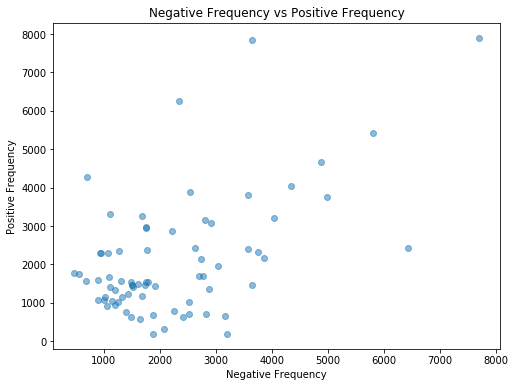

In [191]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_tf", y="pos_tf",
                 fit_reg=False, 
                 scatter_kws={'alpha':0.5},
                 data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.show()

**Top 10 tokens by `abs_diff`**

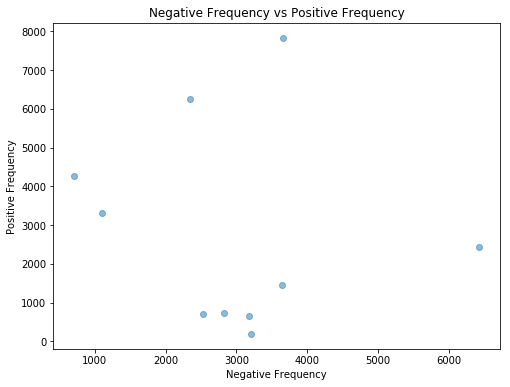

In [190]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_tf", y="pos_tf",
                 fit_reg=False, 
                 scatter_kws={'alpha':0.5},
                 data=term_freq_df \
    .sort_values('abs_diff', ascending=False).iloc[:10])
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.show()

#### Frequency vectors using `Gensim`

`Gensim`’s frequency encoder is called `doc2bow`. To use `doc2bow`, we first create a `Gensim Dictionary` that maps tokens to indices based on observed order (eliminating the overhead of lexicographic sorting). The dictionary object can be loaded or saved to disk, and implements a `doc2bow` library that accepts a pretokenized document and returns a sparse matrix of (id, count) tuples where the id is the token’s id in the dictionary.

In [95]:
import gensim

id2word_p = gensim.corpora \
          .Dictionary(gt_df['words_filtered_porter'])

id2word_p.doc2bow(gt_df.loc[0, 'words_filtered_porter'])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [90]:
gt_df['vector_freq_porter_g'] = \
    gt_df['words_filtered_porter'].apply(id2word_p.doc2bow)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [91]:
gt_df.loc[0, 'vector_freq_porter_g']

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [92]:
gt_df.loc[1000, 'vector_freq_porter_g']

[(83, 1),
 (87, 1),
 (200, 1),
 (224, 1),
 (354, 1),
 (825, 1),
 (1456, 1),
 (2683, 1),
 (2684, 1),
 (2685, 1),
 (2686, 1),
 (2687, 1)]

### One-hot encoding

From [Applied Text Analysis with Python by Tony Ojeda, Rebecca Bilbro, Benjamin Bengfort](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html):

Because they disregard grammar and the relative position of words in documents, **frequency-based encoding methods suffer from the long tail**, or [Zipfian distribution](https://en.wikipedia.org/wiki/Zipf%27s_law), that characterizes natural language. As a result, tokens that occur very frequently are orders of magnitude more “significant” than other, less frequent ones. This can have a significant impact on some models (e.g., generalized linear models) that expect normally distributed features.

A solution to this problem is **one-hot encoding**, a **boolean vector encoding method** that marks a particular vector index with a value of true (1) if the token exists in the document and false (0) if it does not. In other words, **each element** of a one-hot encoded vector reflects either the **presence or absence of the token in the described text**.

One-hot encoding **reduces the imbalance issue of the distribution of tokens**, simplifying a document to its constituent components. This reduction is **most effective for very small documents (sentences, tweets)** that don’t contain very many repeated elements, and is usually applied to models that have very good smoothing properties. One-hot encoding is also **commonly used in artificial neural networks**, whose activation functions require input to be in the discrete range of [0,1] or [-1,1].

#### One-hot encoding using `NLTK`

The `NLTK` implementation of one-hot encoding is a dictionary whose keys are tokens and whose value is True:

In [97]:
def vectorize_oh(doc):
    return {
        token: True
        for token in doc
    }

vectorize_oh(gt_df.loc[0, 'words_filtered_porter'])

{'switchfoot': True,
 'awww': True,
 'bummer': True,
 'shoulda': True,
 'got': True,
 'david': True,
 'carr': True,
 'third': True,
 'day': True}

In [98]:
gt_df['vector_oh_porter'] = \
    gt_df['words_filtered_porter'].apply(vectorize_oh)

gt_df['vector_oh_snowball'] = \
    gt_df['words_filtered_snowball'].apply(vectorize_oh)

In [99]:
gt_df.loc[1000, 'vector_oh_porter']

{'jonathanrknight': True,
 'silver_tulip27': True,
 'would': True,
 'hell': True,
 'fugli': True,
 'poker': True,
 'dog': True,
 'pant': True,
 'cruis': True,
 'jonathan': True,
 'sorri': True,
 'miss': True}

**Dictionaries act as simple sparse matrices** in the `NLTK` case because it is not necessary to mark every absent word False. In addition to the boolean dictionary values, it is also acceptable to use an integer value; 1 for present and 0 for absent.

#### One-hot encoding using `Scikit-learn`

In `Scikit-Learn`, one-hot encoding is implemented with the `Binarizer` transformer in the `preprocessing` module. The **`Binarizer` takes only numeric data**, so the text data **must be transformed** into a numeric space **using the `CountVectorizer`** ahead of one-hot encoding. The `Binarizer` class uses a threshold value (0 by default) such that all values of the vector that are less than or equal to the threshold are set to zero, while those that are greater than the threshold are set to 1. Therefore, by default, the `Binarizer` converts all frequency values to 1 while maintaining the zero-valued frequencies.

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectors_f = vectorizer.fit_transform(gt_df['text'])

In [117]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer

#label_encoder = LabelEncoder()
onehot = Binarizer()

#vectors_fl = label_encoder.fit_transform(vectors_f.toarray())
vectors_oh = onehot.fit_transform(vectors_f)

In [119]:
vectors_oh[0]

<1x138875 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

We could use an optionally use the `vectors_f.toarray()` method in ; it converts the sparse matrix representation to a dense one. However, in corpora with large vocabularies, the sparse matrix representation is much better. 

Note that we could also use `CountVectorizer(binary=True)` to achieve one-hot encoding in the above, obviating the `Binarizer`.

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_b = CountVectorizer(binary=True)

vectors_fb = vectorizer_b.fit_transform(gt_df['text'])

> **CAUTION**
>
>In spite of its name, the `OneHotEncoder` transformer in the `sklearn.preprocessing` module is not exactly the right fit for this task. The `OneHotEncoder` treats each vector component (column) as an independent categorical variable, expanding the dimensionality of the vector for each observed value in each column. In this case, the component `(sight, 0)` and `(sight, 1)` would be treated as two categorical dimensions rather than as a single binary encoded vector component.

#### One-hot encoding using `Gensim`

While `Gensim` does not have a specific one-hot encoder, its `doc2bow` method returns a list of tuples that we can manage on the fly. Extending the code from the `Gensim` frequency vectorization example in the previous section, we can one-hot encode our vectors with our `id2word` dictionary. To get our vectors, an inner list comprehension converts the list of tuples returned from the `doc2bow` method into a list of `(token_id, 1)` tuples and the outer comprehension applies that converter to all documents in the corpus:

In [121]:
import gensim

id2word_p = gensim.corpora \
          .Dictionary(gt_df['words_filtered_porter'])

gt_df['vector_oh_porter_g'] = [
    [(token[0], 1) for token in id2word.doc2bow(doc)]
    for index, doc in gt_df['words_filtered_porter'].iteritems()
]

In [122]:
gt_df.loc[1000, 'vector_oh_porter_g']

[(83, 1),
 (87, 1),
 (200, 1),
 (224, 1),
 (354, 1),
 (825, 1),
 (1456, 1),
 (2683, 1),
 (2684, 1),
 (2685, 1),
 (2686, 1),
 (2687, 1)]

One-hot encoding represents similarity and difference at the document level, but because all words are rendered equidistant, it is not able to encode per-word similarity. Moreover, because all words are equally distant, word form becomes incredibly important; the tokens “trying” and “try” will be equally distant from unrelated tokens like “red” or “bicycle”! Normalizing tokens to a single word class, either through stemming or lemmatization, which we’ll explore later in this chapter, ensures that different forms of tokens that embed plurality, case, gender, cardinality, tense, etc., are treated as single vector components, reducing the feature space and making models more performant.

### Term Frequency – Inverse Document Frequency (TF-IDF)

From [Applied Text Analysis with Python by Tony Ojeda, Rebecca Bilbro, Benjamin Bengfort](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html):

The **bag-of-words** representations that we have explored so far **only describe a document in a standalone fashion**, not taking into account the context of the corpus. A **better approach** would be to consider the **relative frequency or rareness of tokens** in the document **against their frequency in other documents**.

#### Accentuating terms relevant to a specific document

The central insight is that **meaning is most likely encoded in the more rare terms from a document**. For example, in a corpus of sports text, tokens such as “umpire,” “base,” and “dugout” appear more frequently in documents that discuss baseball, while other tokens that appear frequently throughout the corpus, like “run,” “score,” and “play,” are less important.

**TF–IDF**, term frequency–inverse document frequency, encoding **normalizes the frequency of tokens in a document with respect to the rest of the corpus**. This encoding approach accentuates terms that are very relevant to a specific instance.

#### Computing TF–IDF

TF–IDF is computed on a per-term basis, such that the **relevance of a token to a document is measured by the scaled frequency** of the appearance of the term **in the document**, **normalized by the inverse of the scaled frequency** of the term **in the entire corpus**.

The **term frequency** of a term given a document, $T_f(T, D)$, **can be the boolean** frequency (as in **one-hot** encoding, 1 if $T$ occurs in $D$, 0 otherwise), **or the count**. However, **generally both the term frequency and inverse document frequency are scaled logarithmically to prevent bias** of longer documents or terms that appear much more frequently relative to other terms: 

$$ T_f(T, D) = 1 + log(f(T, D)) $$

Similarly, the **inverse document frequency** of a term $T$ given the set of documents $D_c$ can be **logarithmically scaled as follows**: 

$$ ID_f(T, D_c) = log 1 + N n t $$

where $N$ is the number of documents in the corpus $D_c$ and $n(T)$ is the number of occurrences of the term $T$ in all documents in the corpus $D_c$. 

**TF–IDF** is then **computed completely as:** 

$$ T_f ID_f (T, D, D_c) = T_f(T, D) \cdot ID_f(T, D_c) $$

Because the ratio of the $ID_f$ log function is greater or equal to 1, the **TF–IDF score is always greater than or equal to zero**. We interpret the score to mean that the closer the TF–IDF score of a term is to 1, the more informative that term is to that document. The **closer the score is to zero, the less informative that term is**.

#### TD-IDF using `NLTK` (NOT SURE IF WORKING)

>Takes too long on the whole corpus.

To vectorize text in this way with NLTK, we use the `TextCollection` class, a wrapper for a list of texts or a corpus consisting of one or more texts. This class provides support for counting, concordancing, collocation discovery, and more importantly, computing TF-IDF.

Because TF–IDF **requires the entire corpus**, our new version of `vectorize` does not accept a single document, but rather all documents. **After applying** our tokenization function and **creating the text collection**, the function goes through each document in the corpus and **yields a dictionary** whose **keys are the terms** and whose **values are the TF–IDF score** for the term in that particular document.

In [139]:
from nltk.text import TextCollection

texts  = TextCollection(gt_df['words_filtered_porter'])

def vectorize_tfidf(doc):
    global texts
    return {term: texts.tf_idf(term, doc) for term in doc}

vectorize_tfidf(gt_df.loc[0, 'words_filtered_porter'])

{'switchfoot': 1.1997576592284285,
 'awww': 0.6469789796225279,
 'bummer': 0.7792921443486216,
 'shoulda': 0.949614126049929,
 'got': 0.36859895855351643,
 'david': 0.7038653904698764,
 'carr': 1.0687959929682456,
 'third': 0.8443495350561304,
 'day': 0.3035734407335901}

In [140]:
gt_df['vector_tfidf_porter'] = \
    gt_df['words_filtered_porter'].apply(vectorize_tfidf)

KeyboardInterrupt: 

#### TF-IDF using `Scikit-Learn`

`Scikit-Learn` provides a transformer called the `TfidfVectorizer` in the module called `feature_extraction.text` for vectorizing documents with TF–IDF scores. Under the hood, the `TfidfVectorizer` uses the `CountVectorizer` estimator we used to produce the bag-of-words encoding to count occurrences of tokens, followed by a `TfidfTransformer`, which normalizes these occurrence counts by the inverse document frequency.

The input for a TfidfVectorizer is expected to be a sequence of filenames, file-like objects, or strings that contain a collection of raw documents, similar to that of the `CountVectorizer`. As a result, a **default tokenization and preprocessing method is applied unless other functions are specified**. The vectorizer **returns a sparse matrix** representation in the form of **((doc, term), tfidf)** where each key is a document and term pair and the value is the TF–IDF score.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
vectors_tfidf = tfidf.fit_transform(gt_df['text'])

In [138]:
vectors_tfidf[0]

<1x138875 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

#### TF-IDF using `Gensim`

In `Gensim`, the `TfidfModel` data structure is similar to the `Dictionary` object in that it stores a **mapping of terms and their vector positions** in the order they are observed, but **additionally stores the corpus frequency of those terms** so it **can vectorize documents on demand**. 

As before, `Gensim` allows us to apply our own tokenization method, expecting a corpus that is a list of lists of tokens. We first construct the lexicon and use it to instantiate the `TfidfModel`, which computes the normalized inverse document frequency. We can then fetch the TF–IDF representation for each vector using a `getitem`, dictionary-like syntax, after applying the `doc2bow` method to each document using the lexicon.

In [145]:
lexicon_porter = gensim.corpora \
                .Dictionary(gt_df['words_filtered_porter'])

tfidf_porter = gensim.models \
                .TfidfModel(dictionary=lexicon_porter,
                            normalize=True)
vectors_tfidf_porter_g = \
    [tfidf_porter[lexicon_porter.doc2bow(doc)] \
     for doc in gt_df['words_filtered_porter']]

In [146]:
vectors_tfidf_porter_g[0]

[(0, 0.26533001009269147),
 (1, 0.3195924427804628),
 (2, 0.4383197299033522),
 (3, 0.28865947277951665),
 (4, 0.12449731232490863),
 (5, 0.1511646722281774),
 (6, 0.3894425222222734),
 (7, 0.49202790485958237),
 (8, 0.3462728739485645)]

In [147]:
lexicon_snowball = gensim.corpora \
                .Dictionary(gt_df['words_filtered_snowball'])

tfidf_snowball = gensim.models \
                .TfidfModel(dictionary=lexicon_snowball,
                            normalize=True)
vectors_tfidf_snowball_g = \
    [tfidf_snowball[lexicon_snowball.doc2bow(doc)] \
     for doc in gt_df['words_filtered_snowball']]

In [148]:
vectors_tfidf_snowball_g[0]

[(0, 0.26525691132433665),
 (1, 0.31959910981135714),
 (2, 0.43832887370899243),
 (3, 0.28866549451647083),
 (4, 0.12449990946838396),
 (5, 0.1511678256805279),
 (6, 0.38945064639850435),
 (7, 0.4920381690736359),
 (8, 0.34628009756101413)]

`Gensim` provides helper functionality to write dictionaries and models to disk in a compact format, meaning you can conveniently save both the TF–IDF model and the lexicon to disk in order to load them later to vectorize new documents. It is possible (though slightly more work) to achieve the same result by using the pickle module in combination with `Scikit-Learn`. To save a `Gensim` model to disk:

In [149]:
lexicon_porter.save_as_text('lexicon_porter.txt', 
                            sort_by_word=True)
tfidf_porter.save('tfidf_porter.pkl')

lexicon_snowball.save_as_text('lexicon_snowball.txt', 
                              sort_by_word=True)
tfidf_snowball.save('tfidf_snowball.pkl')

This will save the lexicon as a text-delimited text file, sorted lexicographically, and the TF–IDF model as a pickled sparse matrix. Note that the `Dictionary` object can also be saved more compactly in a binary format using its `save` method, but `save_as_text` allows easy inspection of the dictionary for later work. To load the models from disk:

In [150]:
lexicon_porter = \
    gensim.corpora.Dictionary \
          .load_from_text('lexicon_porter.txt')
tfidf_porter = gensim.models.TfidfModel \
          .load('tfidf_porter.pkl')

In [151]:
len(lexicon_porter)

122041

In [152]:
type(lexicon_porter)

gensim.corpora.dictionary.Dictionary

In [154]:
type(tfidf_porter)

gensim.models.tfidfmodel.TfidfModel

One **benefit of TF–IDF** is that it **naturally addresses the problem of stopwords**, those words **most likely to appear in all documents** in the corpus (e.g., “a,” “the,” “of”, etc.), and thus will accrue very small weights under this encoding scheme. This **biases the TF–IDF model toward moderately rare words**. As a result TF–IDF is **widely used for bag-of-words models**, and is an excellent starting point for most text analytics.

### Distributed Representation

From [Applied Text Analysis with Python by Tony Ojeda, Rebecca Bilbro, Benjamin Bengfort](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html):

While frequency, one-hot, and TF–IDF encoding enable us to put documents into vector space, it is **often useful to also encode the similarities between documents** in the context of that same vector space. 

Unfortunately, these vectorization methods produce document vectors with non-negative elements, which means we won’t be able to compare documents that don’t share terms (because two vectors with a cosine distance of 1 will be considered far apart, even if they are semantically similar).

#### Encoding document similarity

When document similarity is important in the context of an application, we **instead encode text along a continuous scale with a distributed representation.** 

This means that the resulting document vector is not a simple mapping from token position to token score. Instead, the **document is represented in a feature space** that has been **embedded to represent word similarity**. 

The complexity of this space (and the resulting vector length) is the product of how the mapping to that representation is learned. The complexity of this space (and the resulting vector length) is the product of how that representation is trained and not directly tied to the document itself.

#### `Word2vec`

`Word2vec`, created by a team of researchers at Google led by Tomáš Mikolov, **implements a word embedding model** that **enables us to create** these kinds of **distributed representations**. 

The `word2vec` algorithm trains word representations based on either a continuous bag-of-words (CBOW) or skip-gram model, such that **words are embedded in space along with similar words based on their context**. For example, `Gensim`’s implementation uses a feedforward network.

#### `Doc2vec`

The `doc2vec` algorithm is an extension of word2vec. It proposes a `paragraph vector`—an **unsupervised algorithm that learns fixed-length feature representations from variable length documents**. 

This representation attempts to inherit the semantic properties of words such that “red” and “colorful” are more similar to each other than they are to “river” or “governance.” 

Moreover, the `paragraph vector` **takes into consideration the ordering of words** within a narrow context, **similar to an n-gram model**. 

The combined result is **much more effective than a bag-of-words or bag-of-n-grams** model because it **generalizes better** and has a **lower dimensionality** but still is of a **fixed length** so it **can be used in common machine learning algorithms.**

#### Distributed representations using `Gensim`

Neither `NLTK` nor `Scikit-Learn` provide implementations of these kinds of word embeddings. **`Gensim`**’s implementation **allows users to train** both `word2vec` and `doc2vec` models on custom corpora and also conveniently **comes with a model that is pretrained on the Google news corpus**.

>NOTE
To use `Gensim`’s pretrained models, you’ll need to download the model bin file, which clocks in at 1.5 GB. For applications that require extremely lightweight dependencies (e.g., if they have to run on an AWS lambda instance), this may not be practicable.

#### Training `Gensim`'s distributed representations model

We can train our own model as follows. First, we create a list of `TaggedDocument` objects, which extend the `LabeledSentence`, and in turn the distributed representation of `word2vec`. 

`TaggedDocument` objects consist of words and tags. We can instantiate the tagged document with the list of tokens along with a single tag, one that uniquely identifies the instance. In this example, we’ve labeled each document as `d{0}".format(index)`, e.g. `d0`, `d1`, `d2` and so forth.

Once we have a list of tagged documents, we instantiate the `Doc2Vec` model and specify the size of the vector as well as the minimum count, which ignores all tokens that have a frequency less than that number. 

Once instantiated, **an unsupervised neural network is trained to learn the vector representations**, which can then be accessed via the docvecs property.

`Doc2Vec` -- class for training, using and evaluating neural networks described [here](http://arxiv.org/pdf/1405.4053v2.pdf).

In [157]:
%%time
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec

corpus_porter = [
    TaggedDocument(words, ['d{0}'.format(index)])
    for index, words \
    in enumerate(gt_df['words_filtered_porter'])
]

model = Doc2Vec(corpus_porter, 
                vector_size=20, 
                min_count=3)
print(model.docvecs[0])

[ 0.03122099  0.00078439 -0.02388878 -0.00316614 -0.00089809 -0.0273197
  0.00300796 -0.00338534 -0.01205865  0.01831736 -0.02676038 -0.00030653
 -0.00299789  0.03640768 -0.03284787  0.01547206  0.00934553 -0.01153573
 -0.01899095 -0.0248764 ]
Wall time: 1min 22s


### Summary of all methods

**Distributed representations will dramatically improve results over TF–IDF models** when used correctly. The model itself can be saved to disk and retrained in an active fashion, making it extremely flexible for a variety of use cases. 

However, **on larger corpora, training can be slow and memory intensive**, and it might not be as good as a TF–IDF model with Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) applied to reduce the feature space. 

Again, the choice of vectorization technique (as well as the library implementation) tend to be use case- and application-specific, as summarized in table below:

|Vectorization Method|Function|Good For|Considerations|
|--------------------|--------|--------|--------------|
|**Frequency**|Counts term frequencies|Bayesian models|Most frequent words not always most informative|
|**One-Hot Encoding**|Binarizes term occurrence (0, 1)|Neural networks|All words equidistant, so normalization extra important|
|**TF–IDF**|Normalizes term frequencies across documents|General purpose|Moderately frequent terms may not be representative of document topics|
|**Distributed Representations**|Context-based, continuous term similarity encoding|Modeling more complex relationships|Performance intensive; difficult to scale without additional tools (e.g., **Tensorflow**)|

## Modeling

### Model assumptions

Every record in in the dataset `'generic_tweets.txt'` represents a tweet written by a real person from the target audience (general population).

## Results

Research question: **“What can public opinion on Twitter tell us about the US airlines in 2015?”**